**Ben-Yishai Ring Network**

This notebook will walk you through the steps to set up a ring network and explore the different activity regimes as described in the introductory paper. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#set standard plotting parameters
plt.rc('text', usetex = True) #comment out this line if run in Noteable
plt.rc('font', family = 'serif')
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize']= 20
plt.rcParams['ytick.labelsize']= 20
plt.rcParams['axes.titlesize'] = 22 

Set-up

We define separate functions to compute one run for the Ben-Yishai ring network with a time dependent input. The network is silent at the beginning of a simulation (r_i(0) = 0). We defined here r_init as a variable which can be used, if you whish to let a simulation start at a certain activity state of an old simulation (e.g. to change the stimulus). We also define function to generate the input and the weight matrixes. 

In [2]:
def BY_ring_network(r_init, W, I, tau, Nt, dt): 
    
    N = W.shape[0]
    r = np.zeros([Nt+1, N])
    
    # r_init will be None, if a simulation is started and all initial values will be 0
    # if r_init is an array with values, the condition below evaluates true and the initial condition are being 
    # replaced by the values given by r_init
    if np.all(r_init): 
        r[0,:] = r_init[:]
    
    for t in range(1,Nt+1): 
        x = (1/N) * W @ r[t-1] + I[t-1]
        r[t] = r[t-1] + dt * 1/tau * (-r[t-1] + x * (x > 0))
    
    return r

def generate_I(N, Nt, c, epsilon, theta, theta0): 
    
    I_ext = np.zeros([Nt,N])
    
    I_ext[:] = c *(1-epsilon + epsilon * np.cos(2*(theta - theta0)))
    
    return I_ext

def generate_W(N, W0, W1, theta): 
    
    assert(N == theta.shape[0])
    
    W = np.zeros([N,N])
    
    #vectorized calculations of the loop below
    W = W0 + W1 * np.cos(2*(np.subtract.outer(theta, theta)))
    
    #for i in range(N): 
    #    for j in range(N): 
    #        W[i,j] = W0 + W1 * np.cos(2*(theta[i]-theta[j]))
    
    return W
    
    
    
#standard parameter
N = 100
tau_m = 10
dt = 1
theta_0 = 0
c = 0.5

theta_p = np.linspace(-np.pi/2,(np.pi/2),N+1)
theta_p = theta_p[:N]

**Hubel and Wiesel regime**

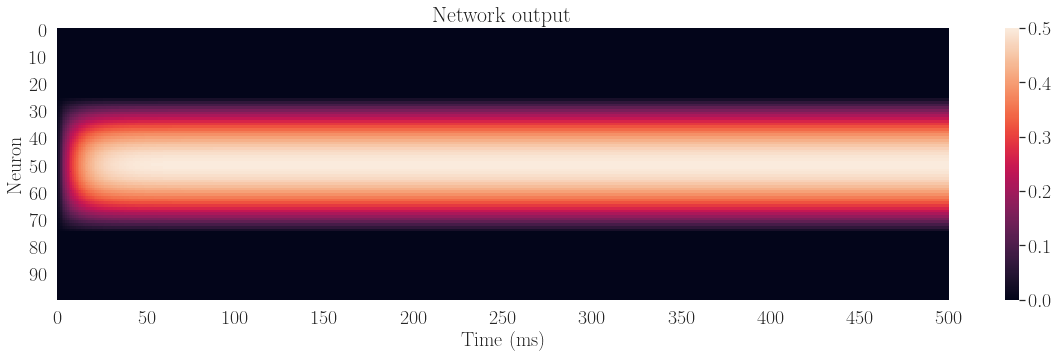

Steady state response


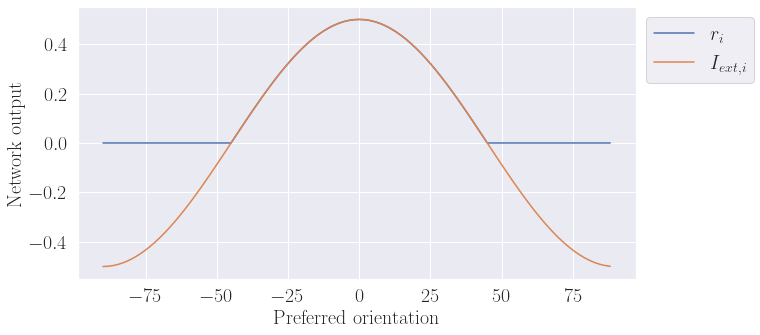

In [3]:
Nt = 500
epsilon = 1
W_HW = generate_W(N, 0, 0, theta_p)
I_ext = generate_I(N, Nt, c, epsilon, theta_p, theta_0)

output = BY_ring_network(None, W_HW, I_ext, tau_m, Nt, dt)

fig, ax = plt.subplots(1,1,  figsize = (20,5))
sns.heatmap(output.T, ax = ax, xticklabels = 50, yticklabels = 10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_title('Network output')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Neuron')
plt.show()

print('Steady state response')
fig, ax = plt.subplots(1,1, figsize = (10,5))
ax.plot(np.degrees(theta_p), output[-1], label = '$r_i$')
ax.plot(np.degrees(theta_p),I_ext[-1], label = '$I_{ext,i}$')
ax.set_ylabel('Network output')
ax.set_xlabel('Preferred orientation')
ax.legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 20)
plt.show()

The network output and the external input have the same dimension and magnitude, therefore we can plot them together in one graph to visualize their relationship. 

You can see that in this regime, the network output is just the rectified external input. All negative values are "rectified" to 0, and the neurons which receive positive input display the same value as the external input. As the neurons to not interact which each other (all weights are 0), this network is solely input driven. 




**Uniform Inhibition regime**

0.0


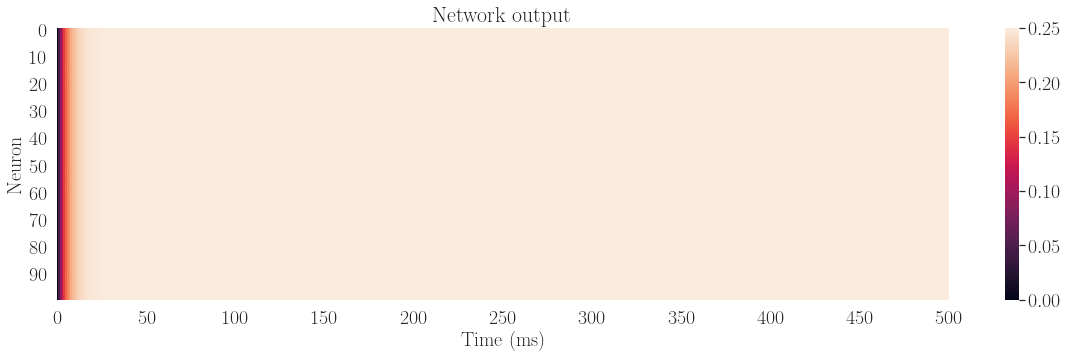

Steady state response


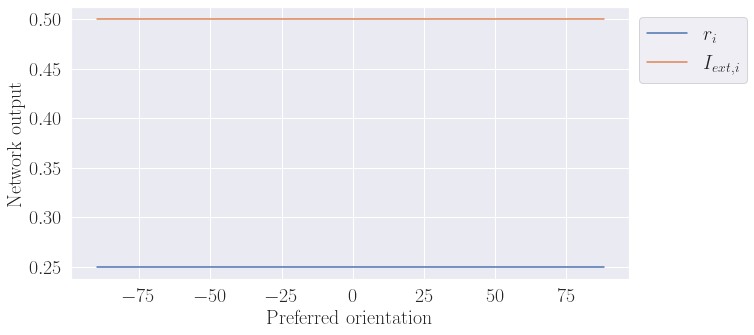

0.1


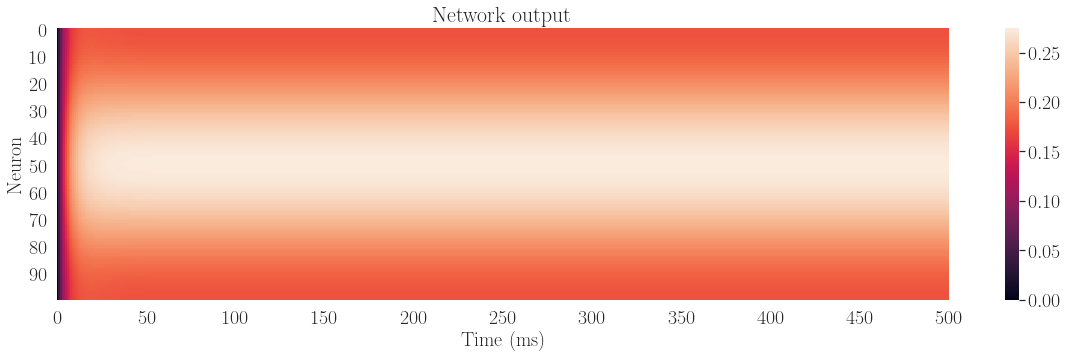

Steady state response


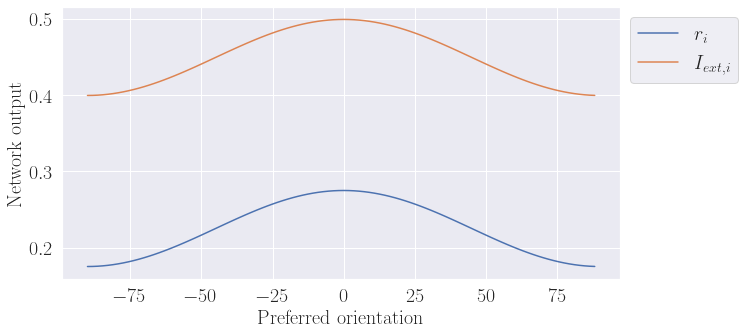

0.2


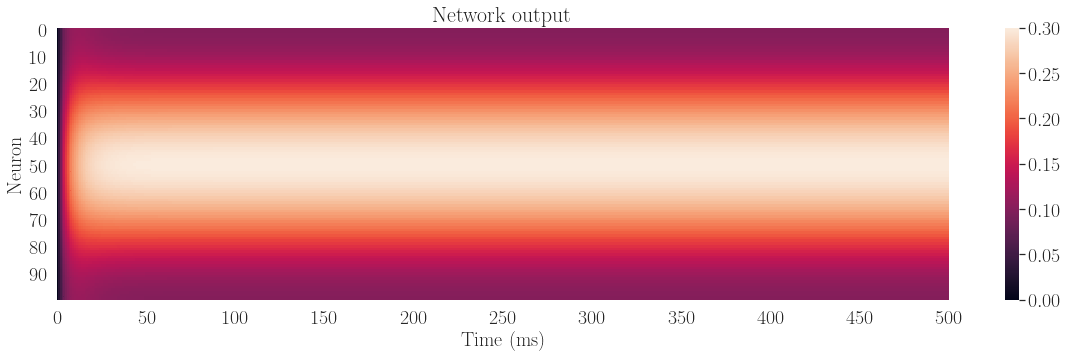

Steady state response


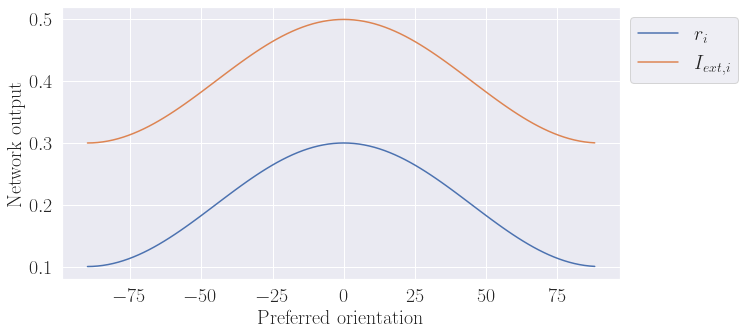

0.30000000000000004


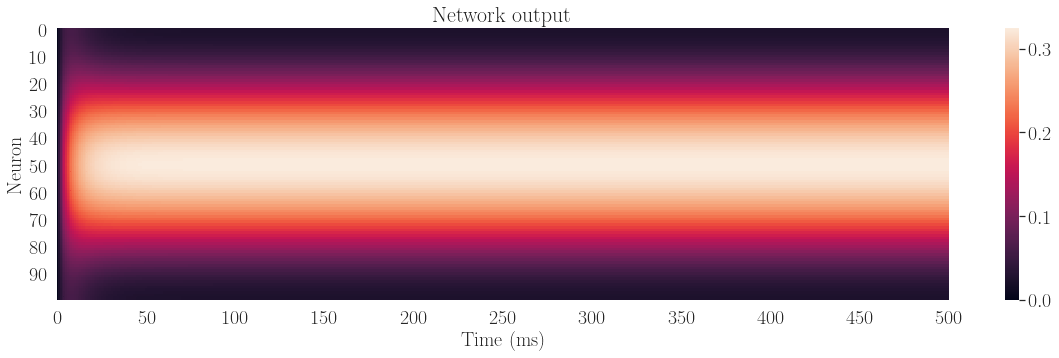

Steady state response


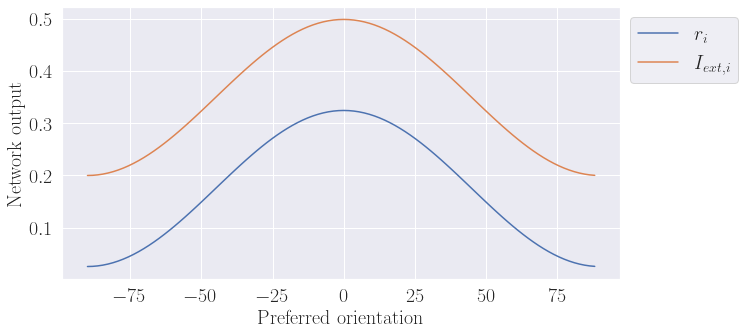

0.4


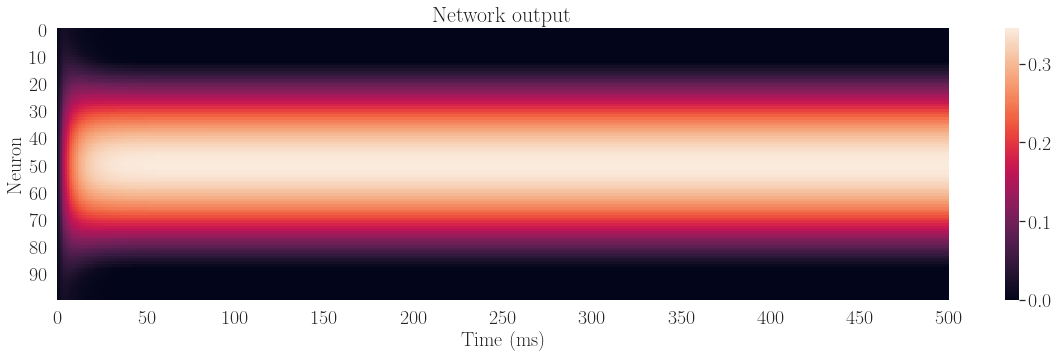

Steady state response


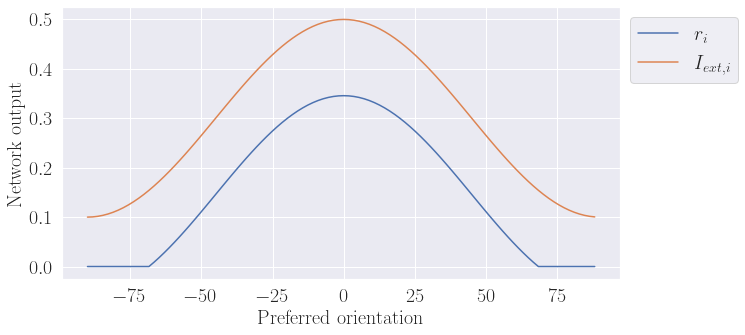

0.5


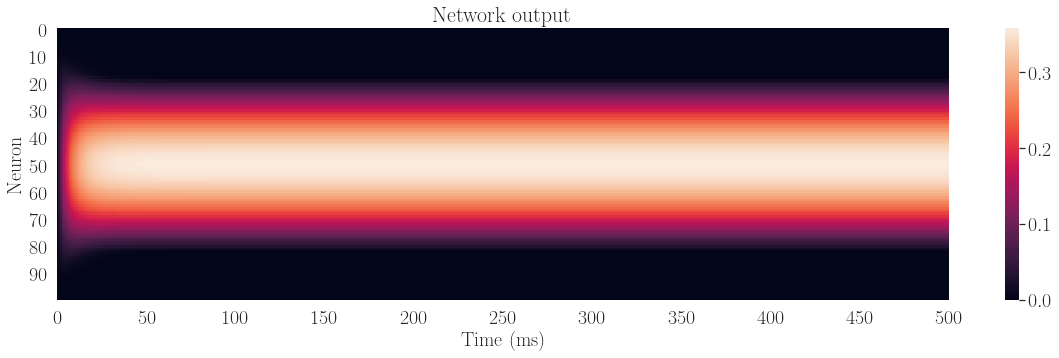

Steady state response


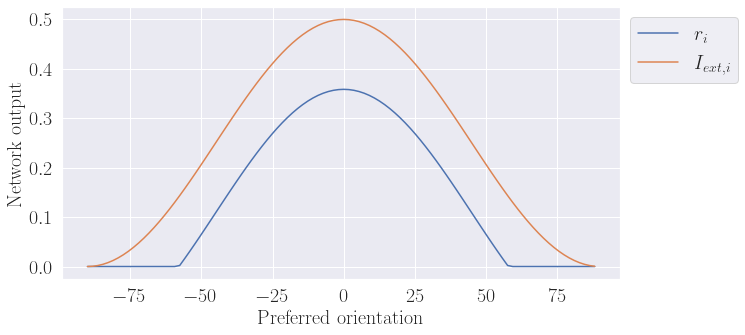

0.6000000000000001


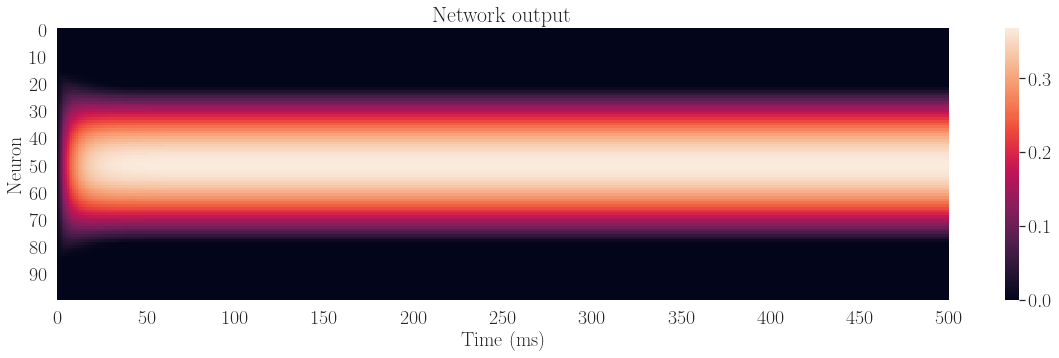

Steady state response


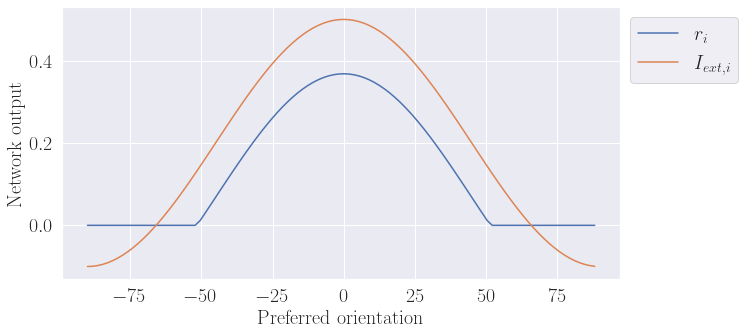

0.7000000000000001


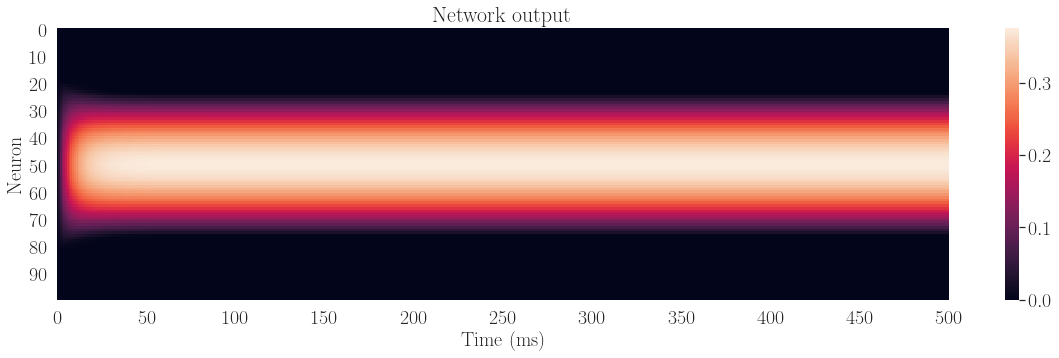

Steady state response


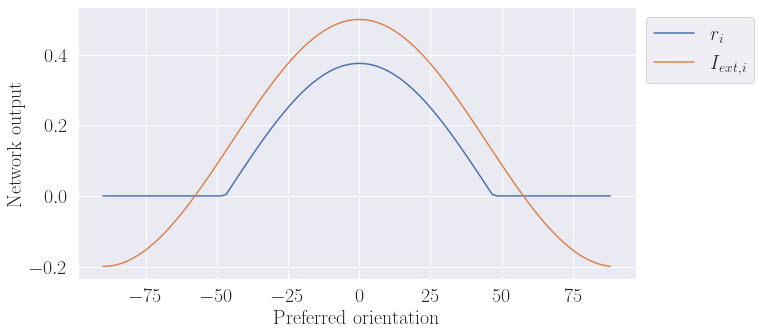

0.8


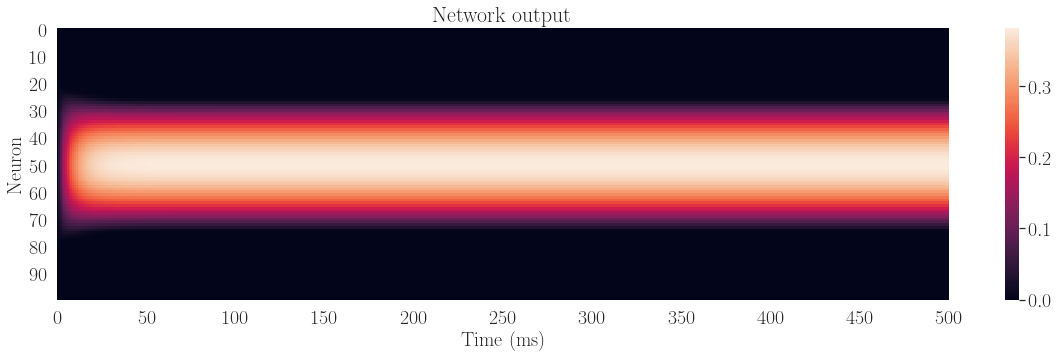

Steady state response


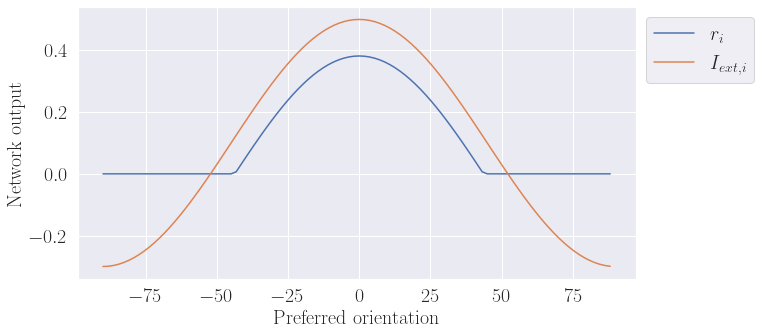

0.9


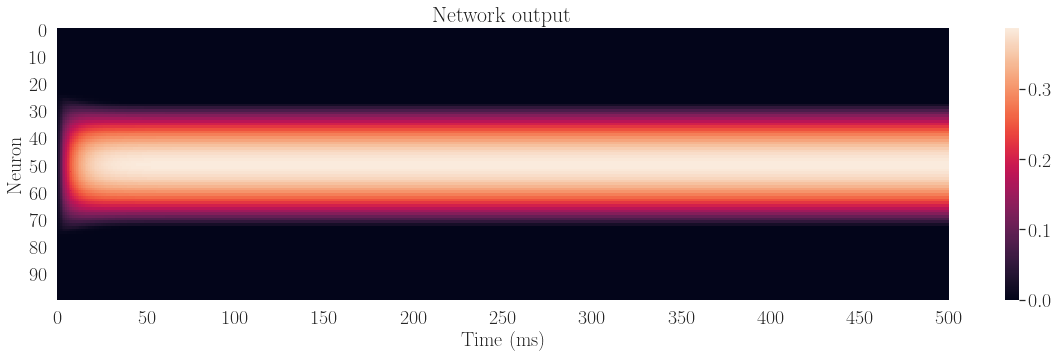

Steady state response


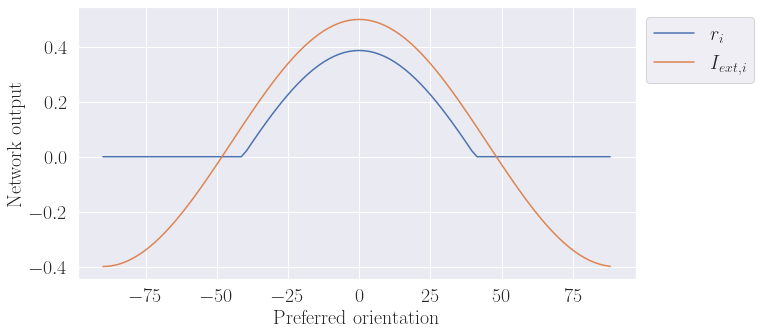

1.0


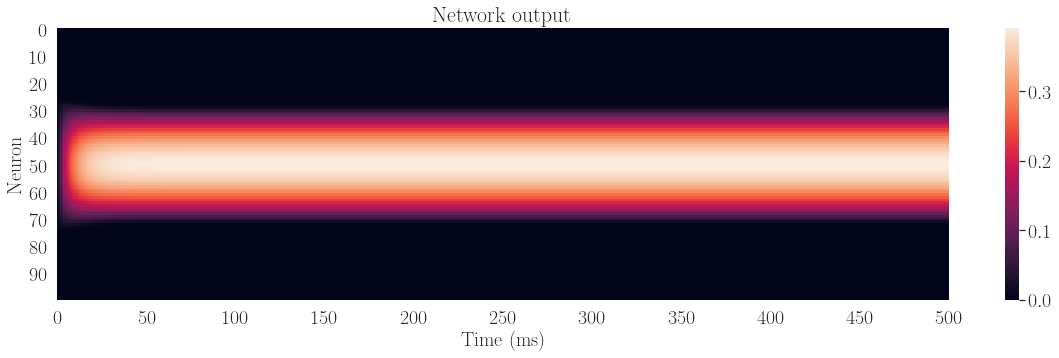

Steady state response


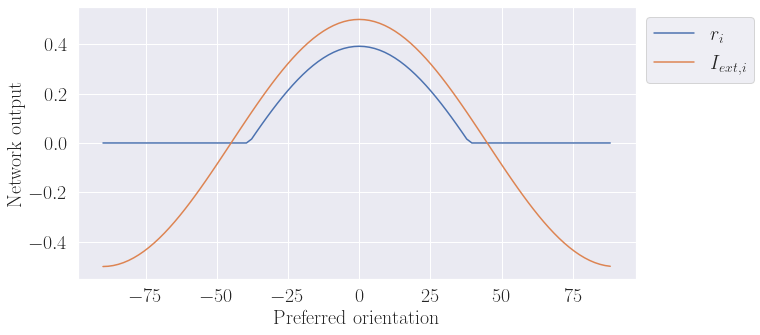

In [4]:
Nt = 500
epsilons = np.linspace(0, 1, 11)   # try a range of different values for the input tuning parameter
W_UI = generate_W(N, -1, 0, theta_p)


for epsilon in epsilons: 
    print(epsilon)
    I_ext = generate_I(N, Nt, c, epsilon, theta_p, theta_0)

    output = BY_ring_network(None, W_UI, I_ext, tau_m, Nt, dt)

    fig, ax = plt.subplots(1,1,  figsize = (20,5))
    sns.heatmap(output.T, ax = ax, xticklabels = 50, yticklabels = 10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title('Network output')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Neuron')
    plt.show()
    
    print('Steady state response')
    fig, ax = plt.subplots(1,1, figsize = (10,5))
    ax.plot(np.degrees(theta_p), output[-1], label = '$r_i$')
    ax.plot(np.degrees(theta_p),I_ext[-1], label = '$I_{ext,i}$')
    ax.set_ylabel('Network output')
    ax.set_xlabel('Preferred orientation')
    ax.legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 20)
    plt.show()

You can see that the uniform inhibition network behaves differently from the Hubel-Wiesel network. The network is still strongly input driven, but the uniform inhibition it receives, decreases the overall activity in the network, so that the network generally displays a lower level of activity than the external input and narrower bump. The network can have all cells above threshold or some cells below threshold depending on the choice of epsilon.



**Marginal regime**

$\epsilon = $0.0


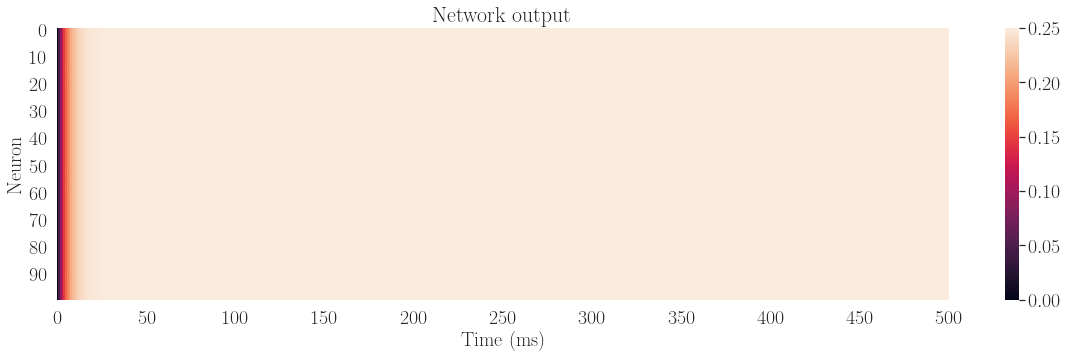

Steady state response


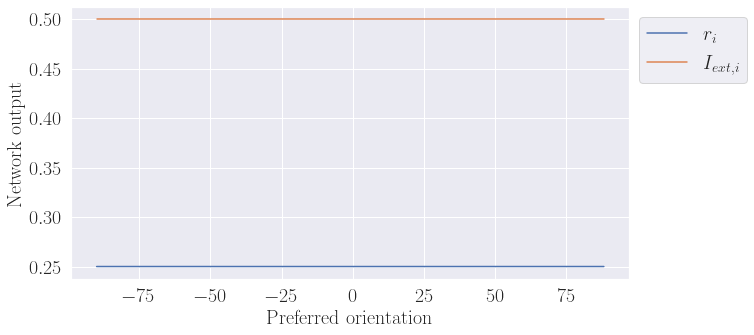

$\epsilon = $0.1


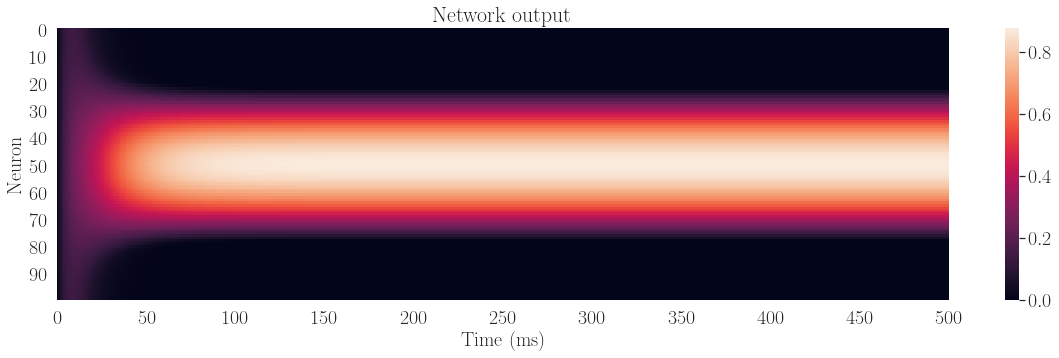

Steady state response


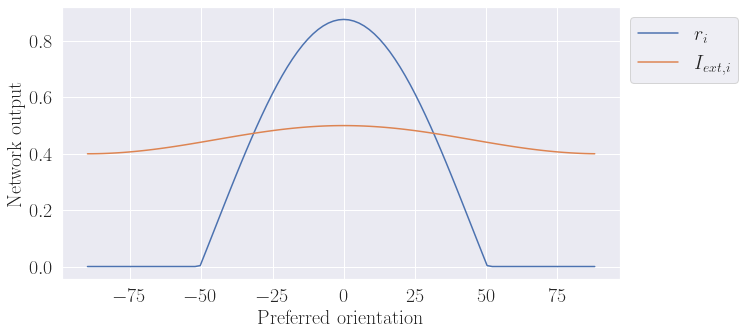

$\epsilon = $0.2


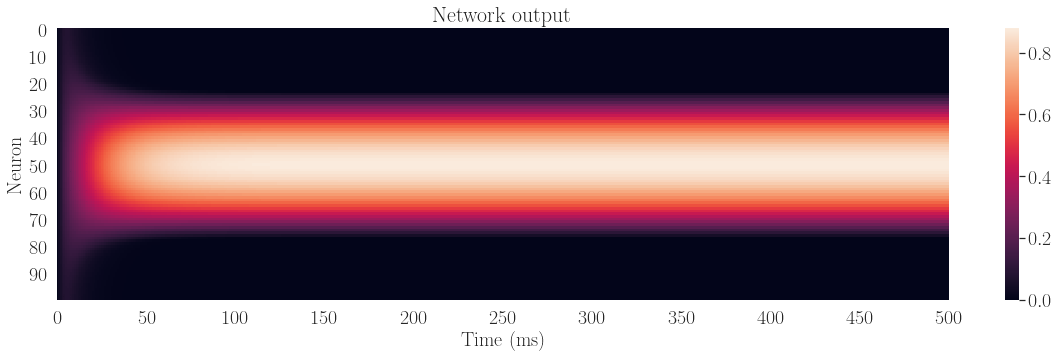

Steady state response


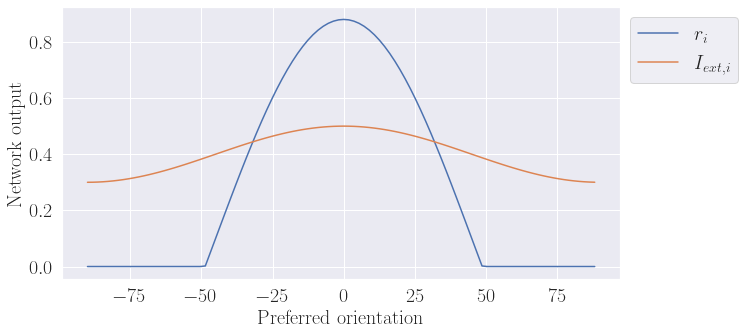

$\epsilon = $0.30000000000000004


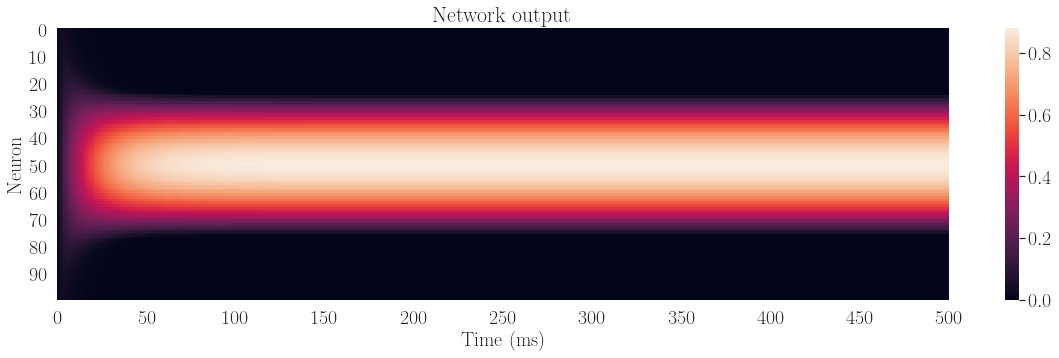

Steady state response


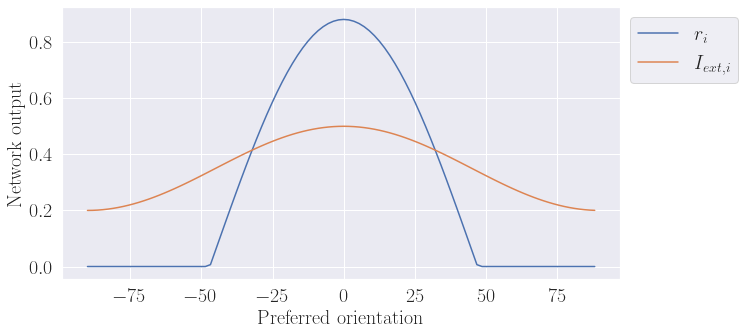

$\epsilon = $0.4


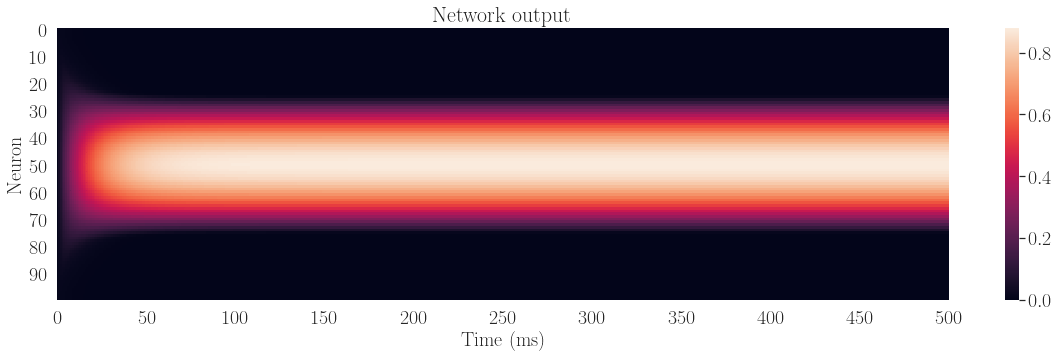

Steady state response


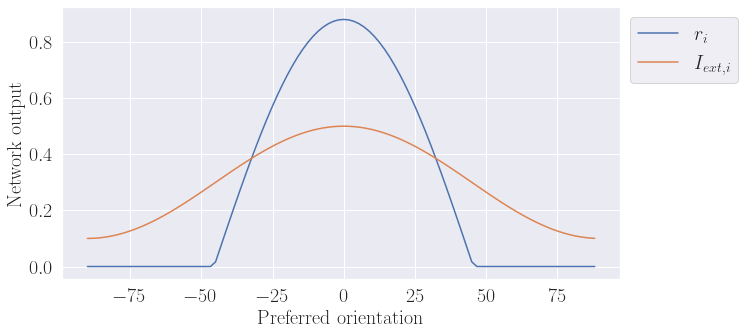

$\epsilon = $0.5


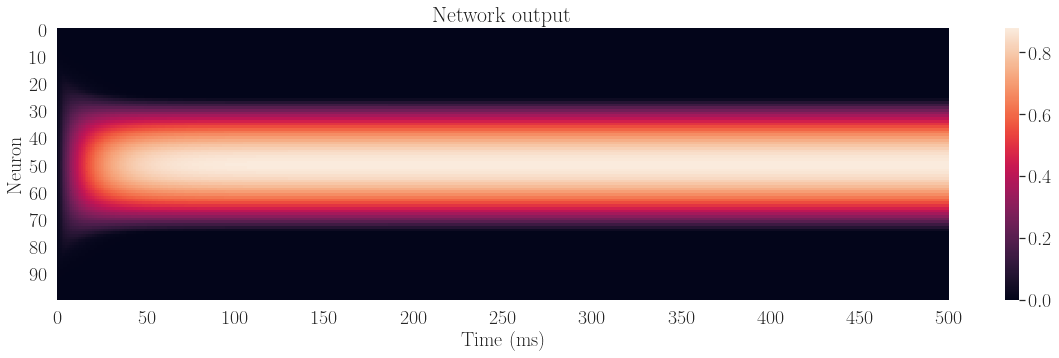

Steady state response


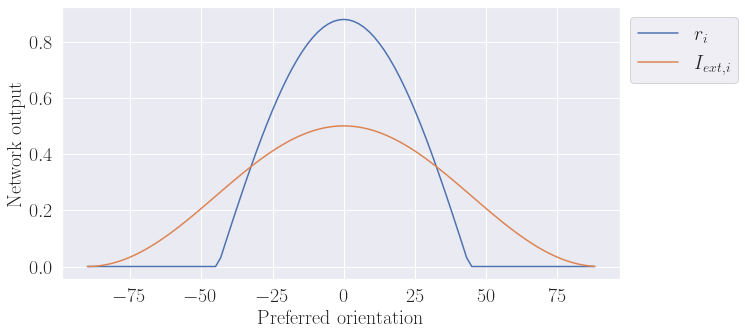

$\epsilon = $0.6000000000000001


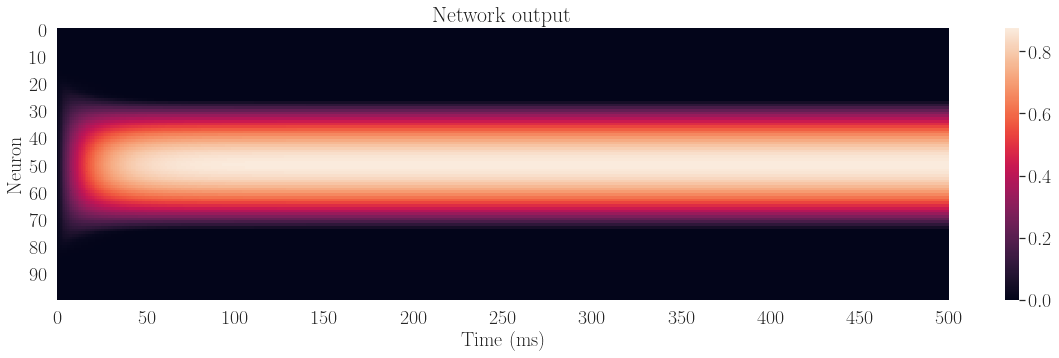

Steady state response


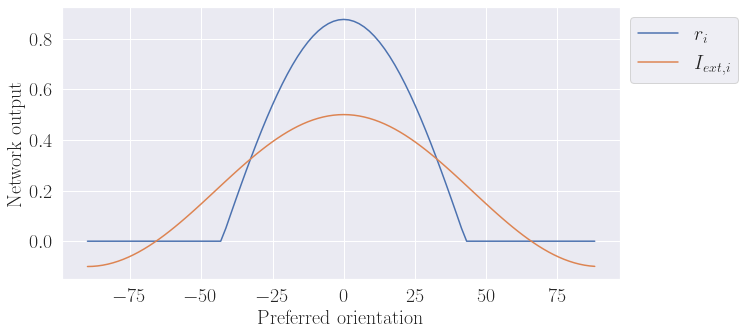

$\epsilon = $0.7000000000000001


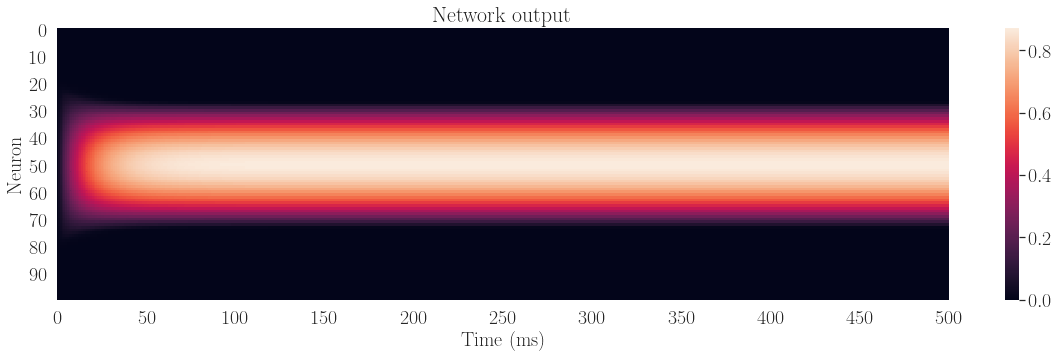

Steady state response


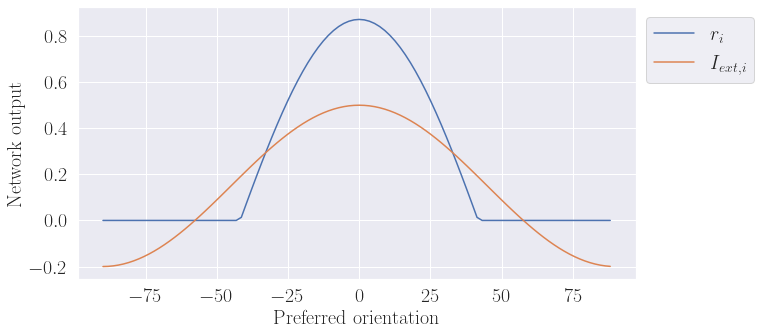

$\epsilon = $0.8


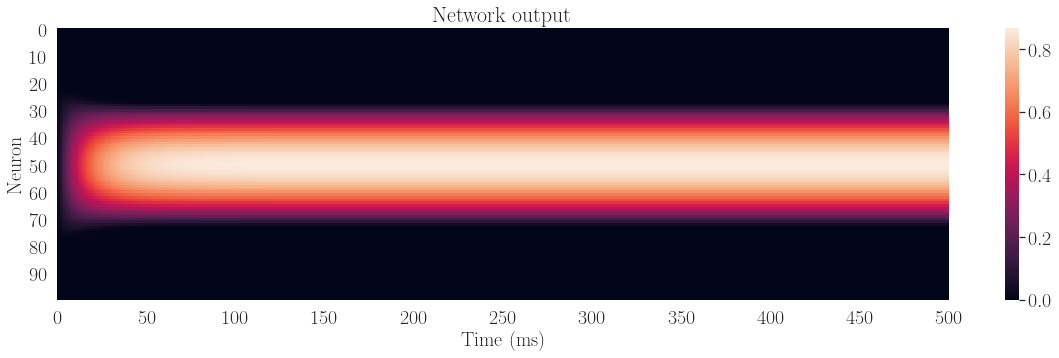

Steady state response


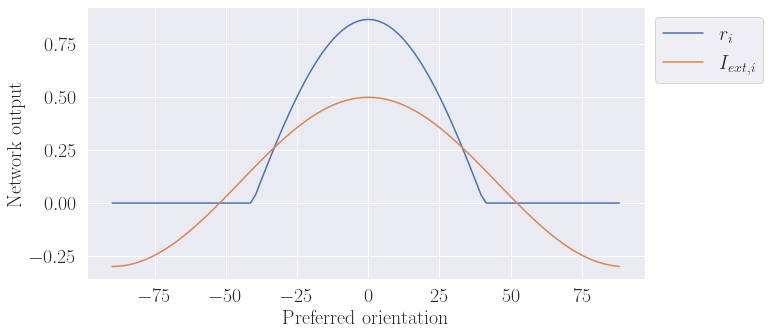

$\epsilon = $0.9


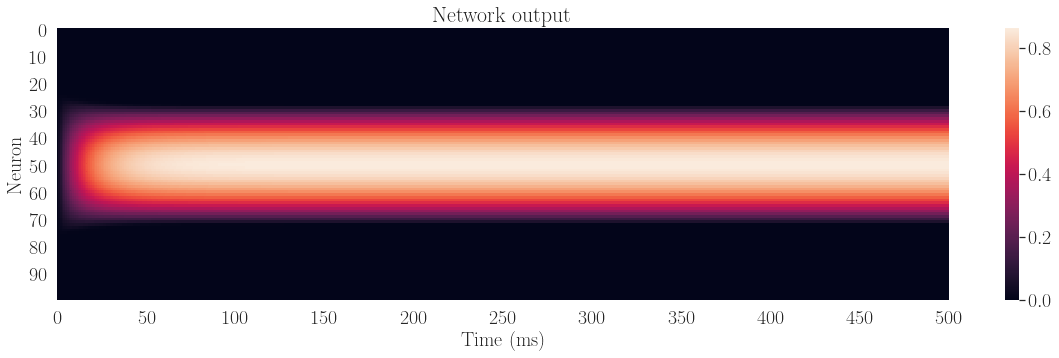

Steady state response


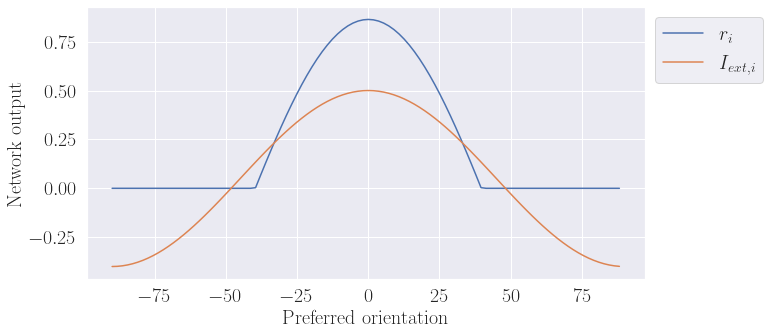

$\epsilon = $1.0


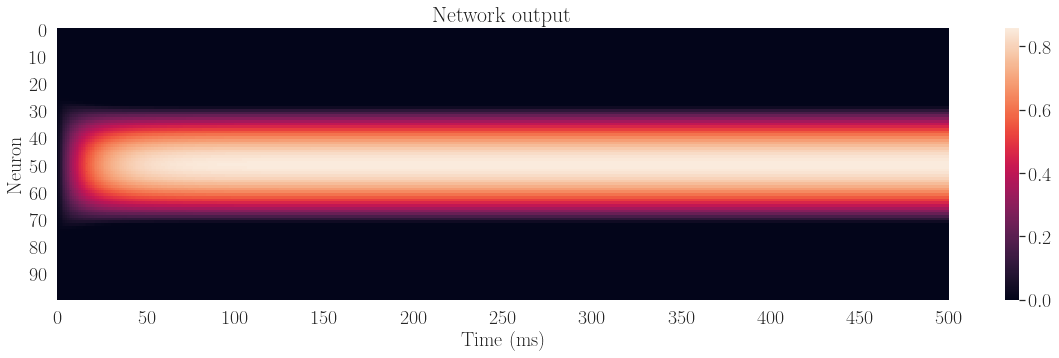

Steady state response


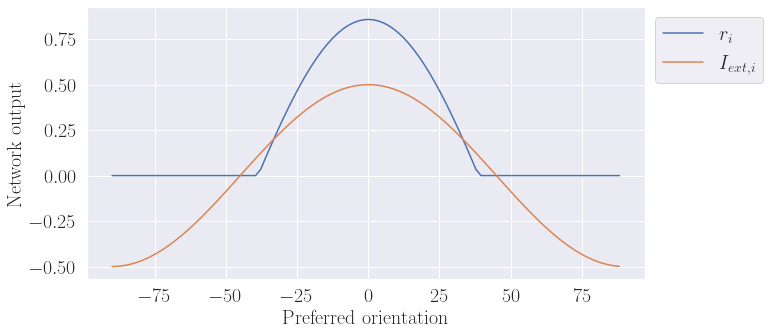

In [5]:
Nt = 500
epsilons = np.linspace(0, 1, 11)
W_MR = generate_W(N, -1, 3, theta_p)


for epsilon in epsilons: 
    print('$\epsilon = $'+str(epsilon))
    I_ext = generate_I(N, Nt, c, epsilon, theta_p, theta_0)
    output = BY_ring_network(None, W_MR, I_ext, tau_m, Nt, dt)

    fig, ax = plt.subplots(1,1,  figsize = (20,5))
    sns.heatmap(output.T, ax = ax, xticklabels = 50, yticklabels = 10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title('Network output')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Neuron')
    plt.show()
    
    print('Steady state response')
    fig, ax = plt.subplots(1,1, figsize = (10,5))
    ax.plot(np.degrees(theta_p), output[-1], label = '$r_i$')
    ax.plot(np.degrees(theta_p),I_ext[-1], label = '$I_{ext,i}$')
    ax.set_ylabel('Network output')
    ax.set_xlabel('Preferred orientation')
    ax.legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 20)
    plt.show()

In the marginal regime, the network is driven primarily by recurrent interactions. A stable and strongly tuned bump forms in the steady state even for very small values of input tuning epsilon. In general, the recurrent dynamics sharpen the bump relative to the input, and the shape of the resonse bump is relatively insensitive to the shape of the input. 

To visualize how the weight matrixes look like for the different regimes, we plotted them next to each other below: 
The marginal regime is the only regime where the weight matrix shows a structure.  

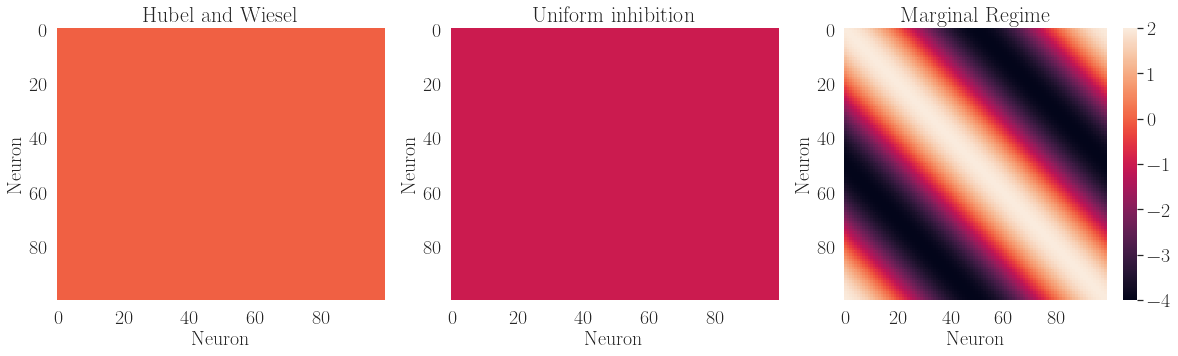

In [6]:
fig, ax = plt.subplots(1,3, figsize = (20,5))
ax[0] = sns.heatmap(W_HW, cbar = False, vmin = -4, vmax = 2, ax = ax[0], xticklabels = 20, yticklabels = 20)
ax[0].set_yticklabels(ax[0].get_yticklabels(), rotation=0)
ax[0].set_ylabel('Neuron')
ax[0].set_xlabel('Neuron')
ax[0].set_title('Hubel and Wiesel')
ax[1] = sns.heatmap(W_UI, cbar = False,  vmin = -4, vmax = 2, ax = ax[1], xticklabels = 20, yticklabels = 20 )
ax[1].set_yticklabels(ax[1].get_yticklabels(), rotation=0)
ax[1].set_ylabel('Neuron')
ax[1].set_xlabel('Neuron')
ax[1].set_title('Uniform inhibition')
ax[2] = sns.heatmap(W_MR, cbar = True,  vmin = -4, vmax = 2, ax = ax[2], xticklabels = 20, yticklabels = 20 )
ax[2].set_yticklabels(ax[2].get_yticklabels(), rotation=0)
ax[2].set_ylabel('Neuron')
ax[2].set_xlabel('Neuron')
ax[2].set_title('Marginal Regime')
plt.show()

**Experiments**

1. Stimulus rotation

There are two different possibilities on how to use the function BY_ring_network() to collect teh results of a stimulus rotation. You can either define your stimulus for one whole simulation, so that the stimulus in itself already is changing (as shown below). Or you can run two seperate simulations with two different stimuli and use the last timepoint of the 1st simulation (using the 1st stimulus) as r_init for the second simulation (using the 1nd stimulus), as shown below for the stimulus deletion experiments. 

Hubel and Wiesel regime


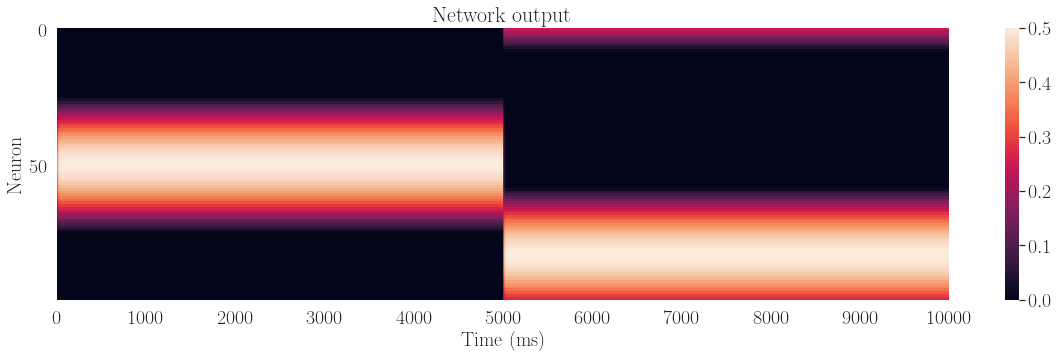

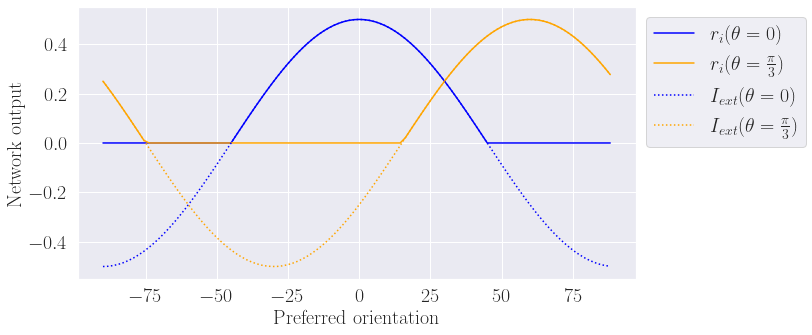

Uniform Inhibition


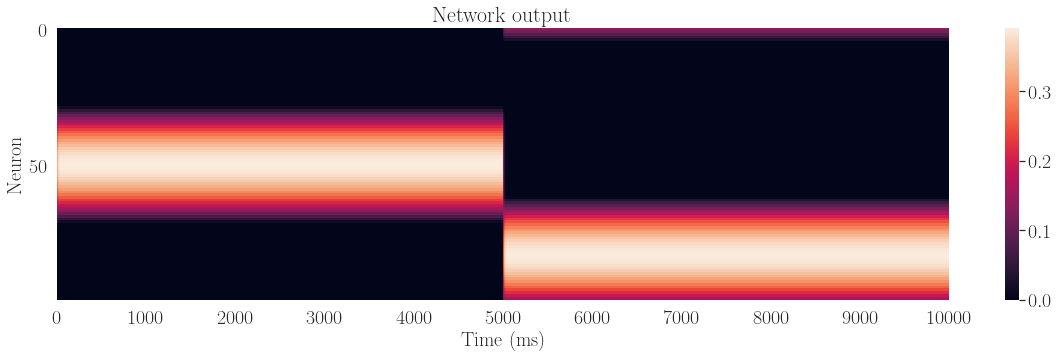

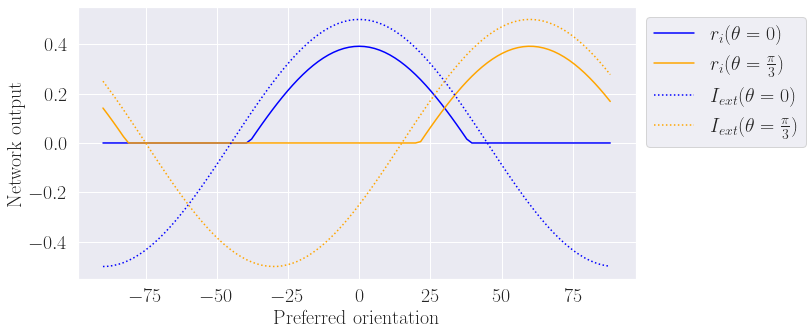

Marginal Regime


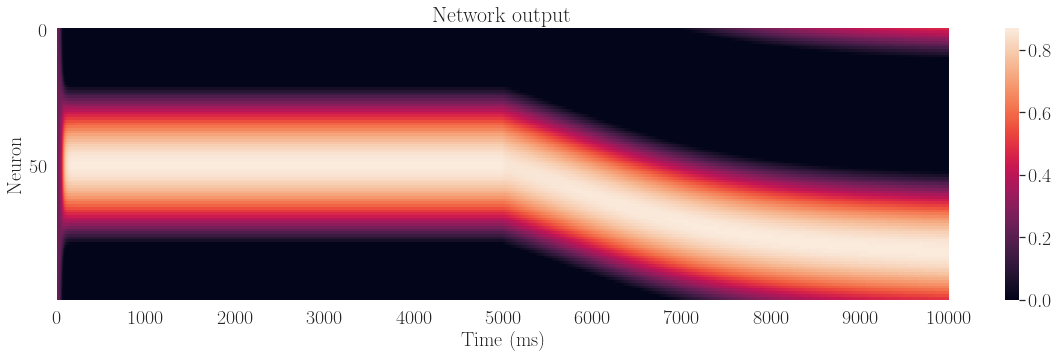

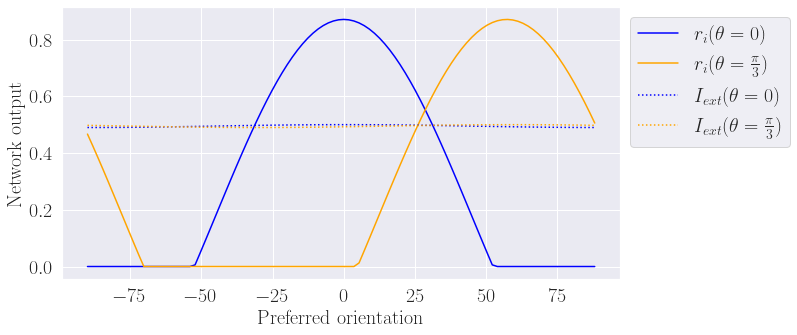

In [7]:
Nt = 5000

epsilon_HW = 1
epsilon_UI = 1
epsilon_MR = 0.01


theta_0_1sthalf = 0
theta_0_2ndhalf = np.pi/3 # 60 degrees rotation

epsilons = [epsilon_HW, epsilon_UI, epsilon_MR]
Ws = [W_HW, W_UI, W_MR]
network_names = ['Hubel and Wiesel regime', 'Uniform Inhibition', 'Marginal Regime']


for sim in range(len(epsilons)): 
    print(network_names[sim])
    I_ext_first = generate_I(N, Nt, c, epsilons[sim], theta_p, theta_0_1sthalf)
    I_ext_second = generate_I(N, Nt, c, epsilons[sim], theta_p, theta_0_2ndhalf)
    I_ext = np.concatenate((I_ext_first, I_ext_second), axis = 0)
    
    output = BY_ring_network(None, Ws[sim], I_ext, tau_m, Nt*2, dt)

    fig, ax = plt.subplots(1,1, figsize = (20,5))
    sns.heatmap(output.T, ax = ax, xticklabels = 1000, yticklabels = 50, )
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title('Network output')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Neuron')
    plt.show()
    
    fig, ax = plt.subplots(1,1, figsize = (10,5))
    ax.plot(np.degrees(theta_p), output[Nt-1], color = 'blue', label = '$r_i(\\theta = 0)$')
    ax.plot(np.degrees(theta_p), output[(2*Nt)-1], color = 'orange', label = '$r_i(\\theta = \\frac{\pi}{3})$')
    ax.plot(np.degrees(theta_p),I_ext[Nt-1], color = 'blue', linestyle = ':', label = '$I_{ext}(\\theta = 0)$')
    ax.plot(np.degrees(theta_p), I_ext[(2*Nt-1)], color = 'orange', linestyle = ':', label = '$I_{ext}(\\theta = \\frac{\pi}{3})$')
    ax.set_xlabel('Preferred orientation')
    ax.set_ylabel('Network output')
    ax.legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 20)
    plt.show()




You can see that the network in the marginal regime behaves qualitatively different than the other two networks. All of them encode the new stimulus after the change and reach a steady state. However, in the first two regimes the bump collapses and a new bump is formed, while in the marginal regime due to the recurrent dynamics the bump holds its shape and slow moves to the new location on the ring. This generates long temporal correlations in network activity that can be tested experimentally.


**Stimulus deletion**

Hubel and Wiesel regime


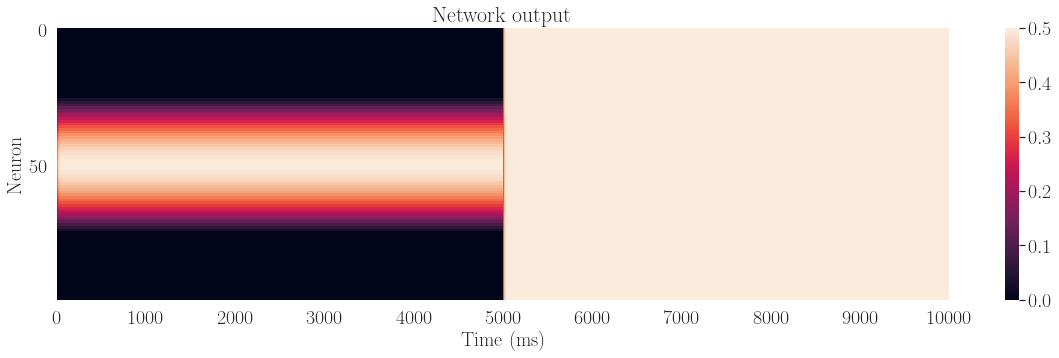

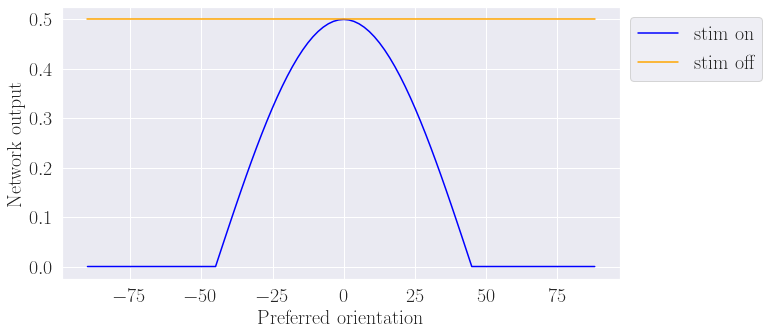

Uniform Inhibition


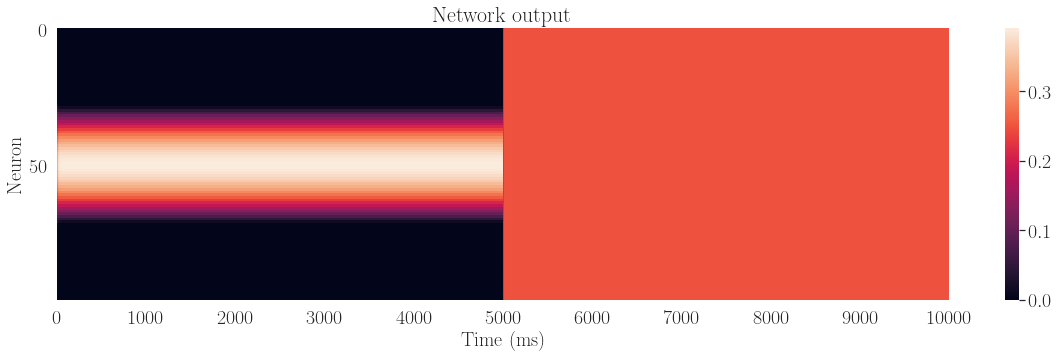

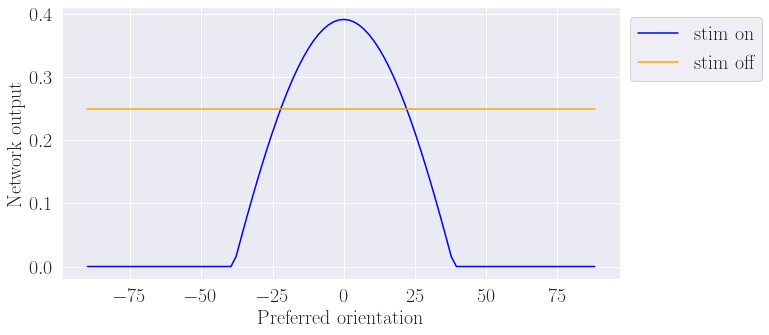

Marginal Regime


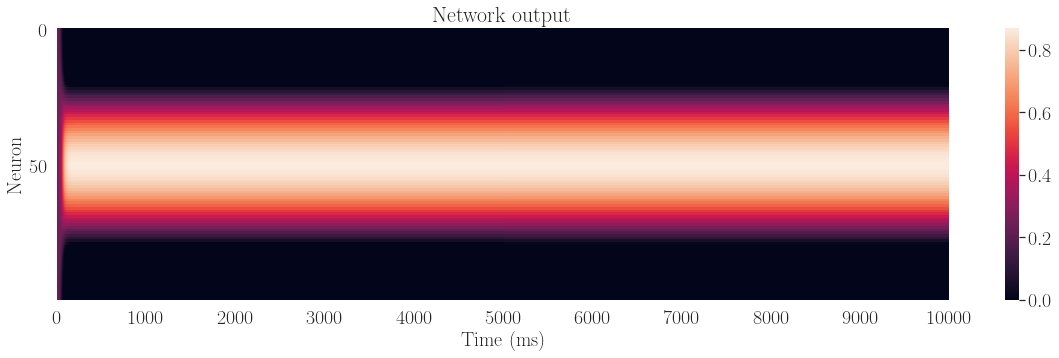

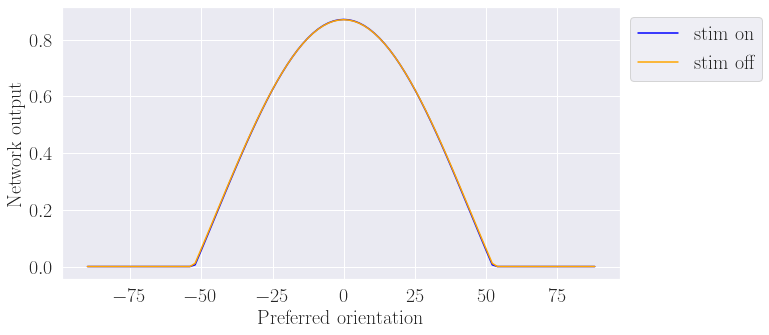

In [8]:
Nt = 5000

epsilon_HW = 1
epsilon_UI = 1
epsilon_MR = 0.01


theta_0 = 0

epsilons = [epsilon_HW, epsilon_UI, epsilon_MR]
Ws = [W_HW, W_UI, W_MR]
network_names = ['Hubel and Wiesel regime', 'Uniform Inhibition', 'Marginal Regime']


for sim in range(len(epsilons)):
    print(network_names[sim])
    I_ext = generate_I(N, Nt, c, epsilons[sim], theta_p, theta_0)
    output_stimOn = BY_ring_network(None, Ws[sim], I_ext, tau_m, Nt, dt)

    I_ext[:] = c
    output_stimOff = BY_ring_network(output_stimOn[-1], Ws[sim], I_ext, tau_m, Nt, dt)
    
    output = np.concatenate((output_stimOn, output_stimOff), axis = 0)
    

    fig, ax = plt.subplots(1,1, figsize = (20,5))
    sns.heatmap(output.T, ax = ax, xticklabels = 1000, yticklabels = 50,  )
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title('Network output')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Neuron')
    plt.show()
    
    fig, ax = plt.subplots(1,1, figsize = (10,5))
    ax.plot(np.degrees(theta_p), output[Nt-1], color = 'blue', label = 'stim on')
    ax.plot(np.degrees(theta_p), output[(2*Nt)-1], color = 'orange', label = 'stim off')
    ax.set_xlabel('Preferred orientation')
    ax.set_ylabel('Network output')
    ax.legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 20)
    plt.show()




When the stimulus is delted the networks in the Hubel and Wiesel regime and uniform inhibition regimes lose the stimulus tuning of their responses (i.e., the bump disappears). Only the network in the marginal regime is still able to encode the stimulus after its deletetion. Notice that the shape of the bump barely changes after stimulus deletion in the marginal regime.


**Persistent noisy input**

In [9]:
def generate_noisy_I(N, Nt, c, epsilon, theta, theta0, sigma, rseed = 1, dt = 1): 
    
    I_ext = np.zeros([Nt,N])
    rng = np.random.RandomState(seed = rseed)
    
    I_ext[:] = c *(1-epsilon + epsilon * np.cos(2*(theta - theta0))) + (1/np.sqrt(dt)) *sigma * rng.randn(Nt,N)
    
    return I_ext

Hubel and Wiesel regime


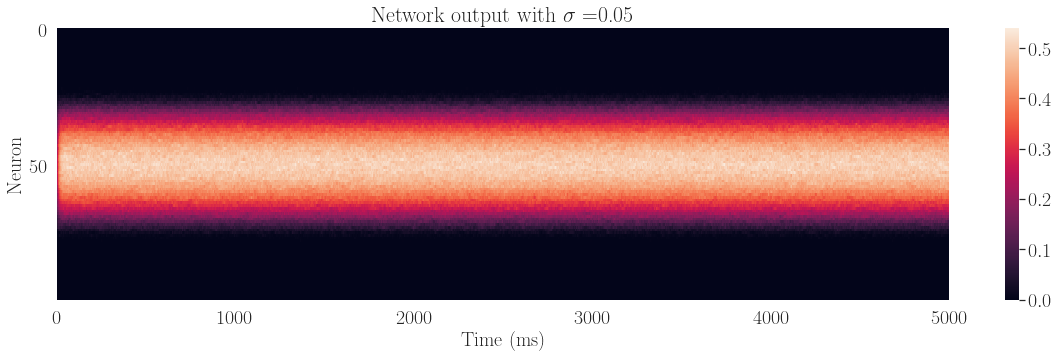

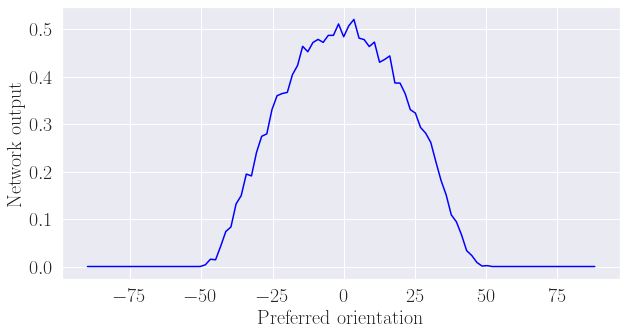

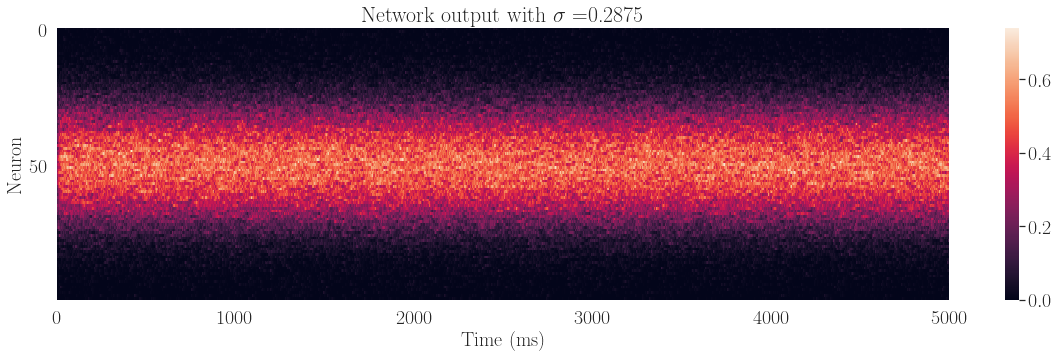

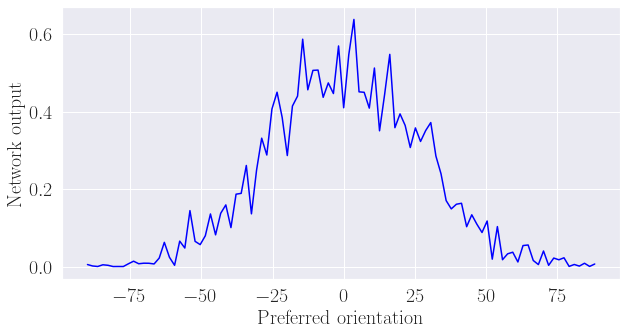

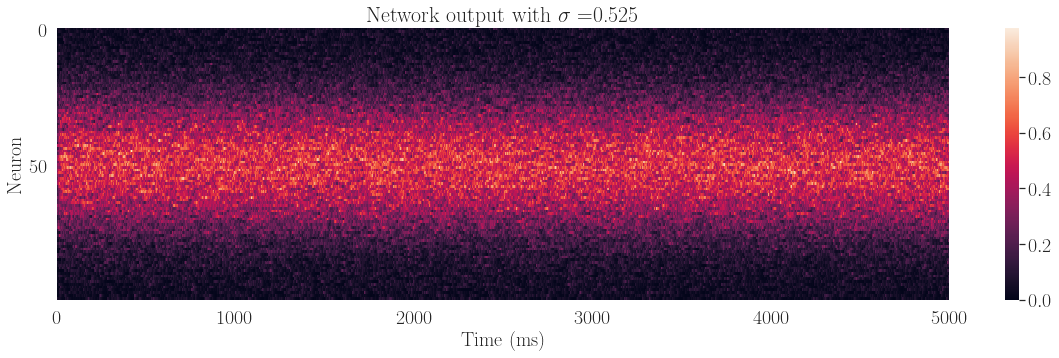

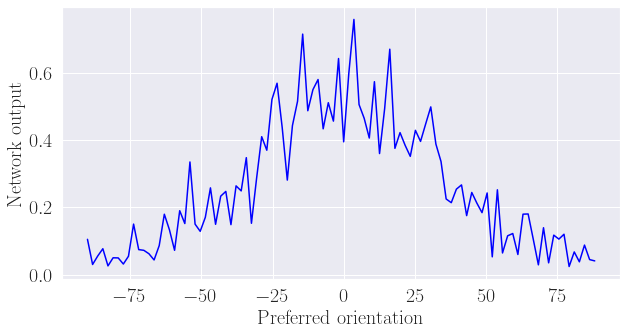

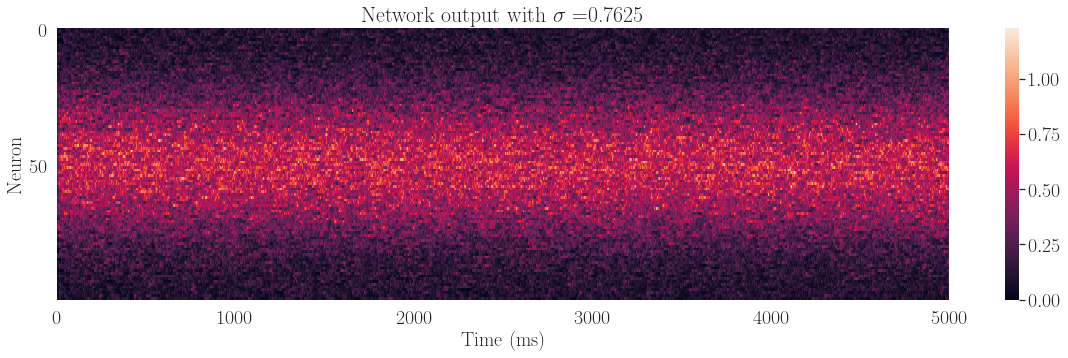

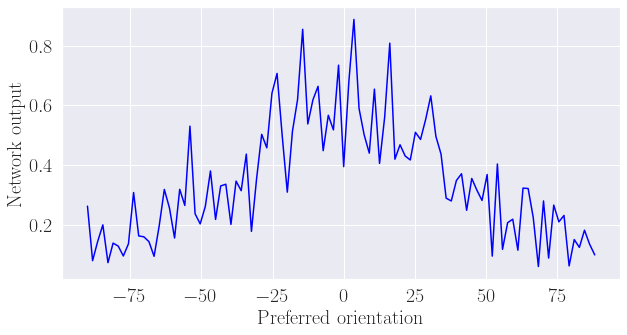

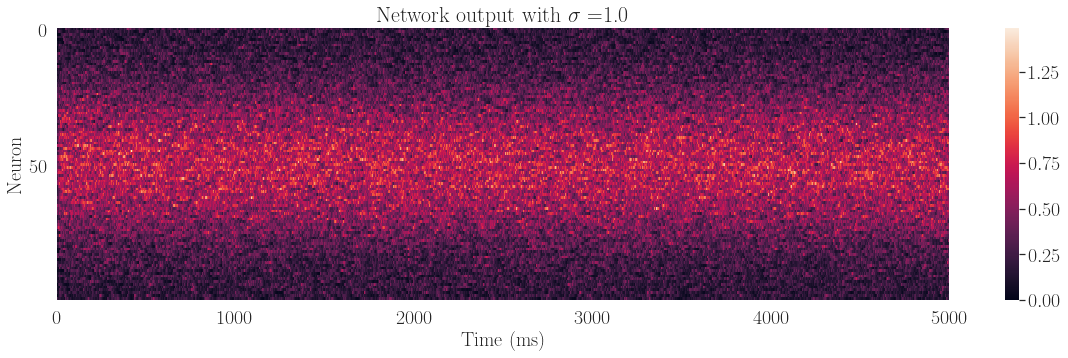

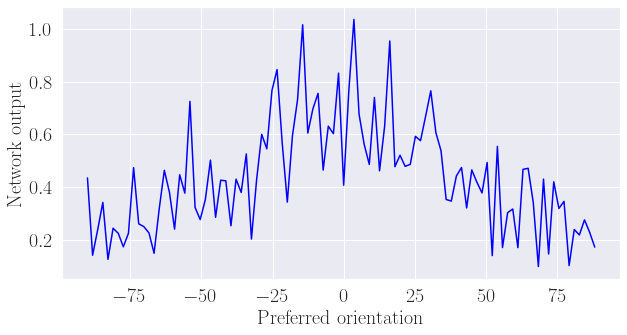

Uniform Inhibition


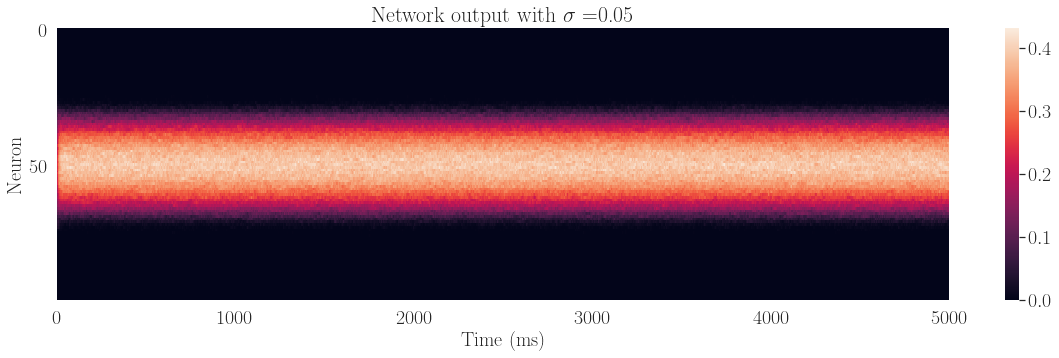

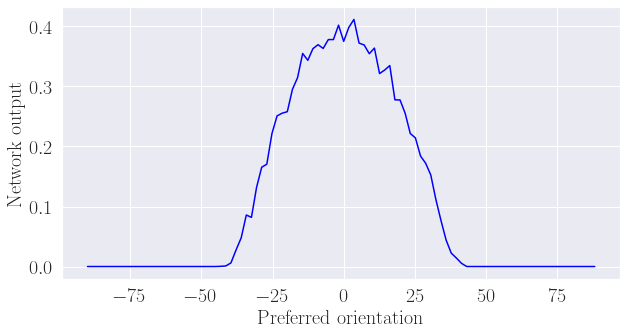

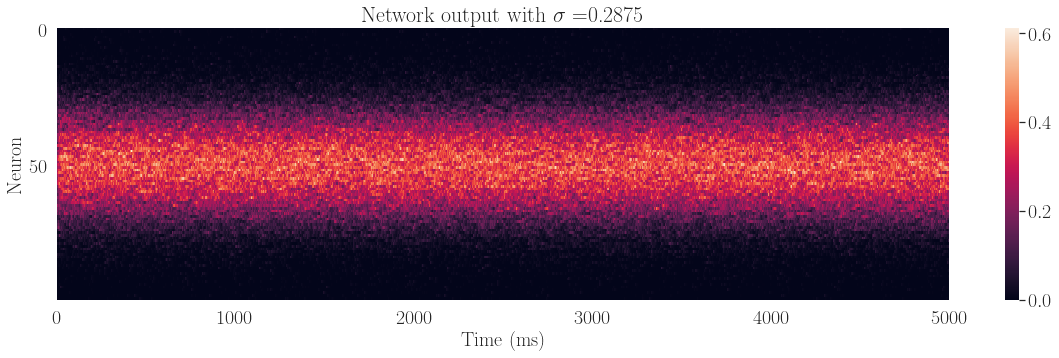

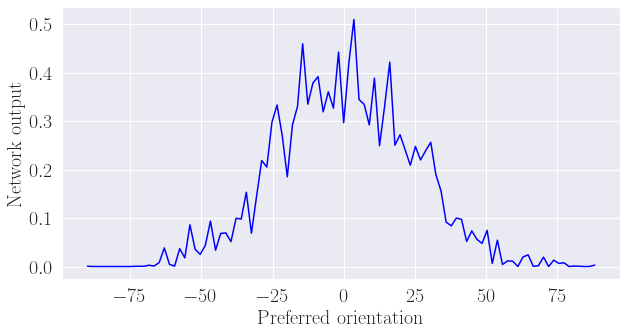

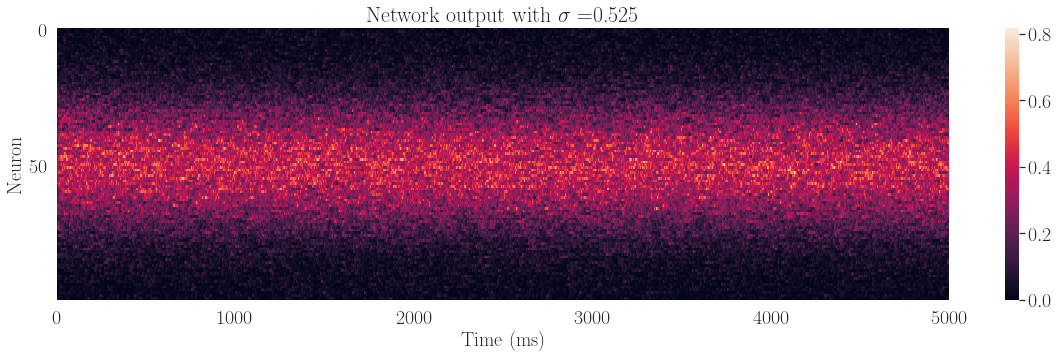

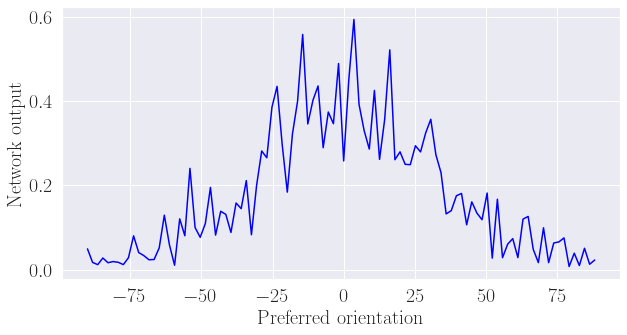

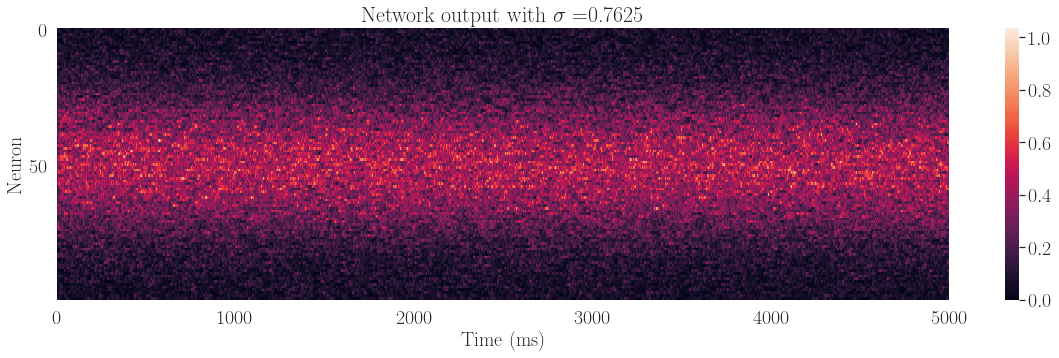

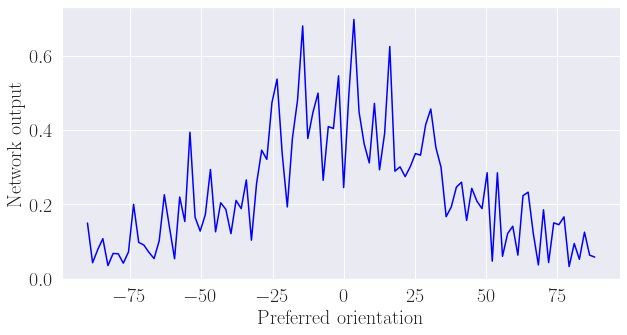

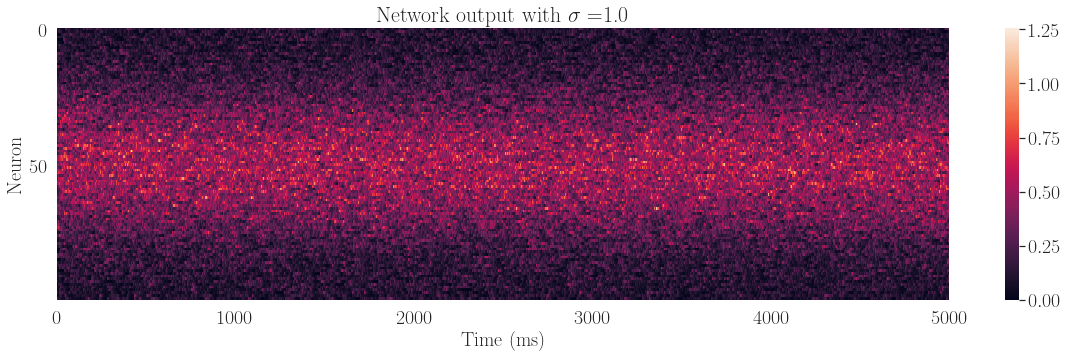

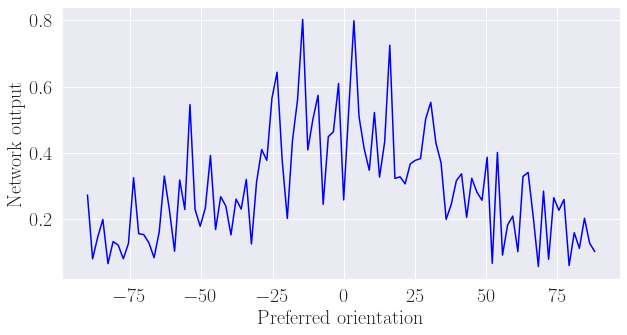

Marginal Regime


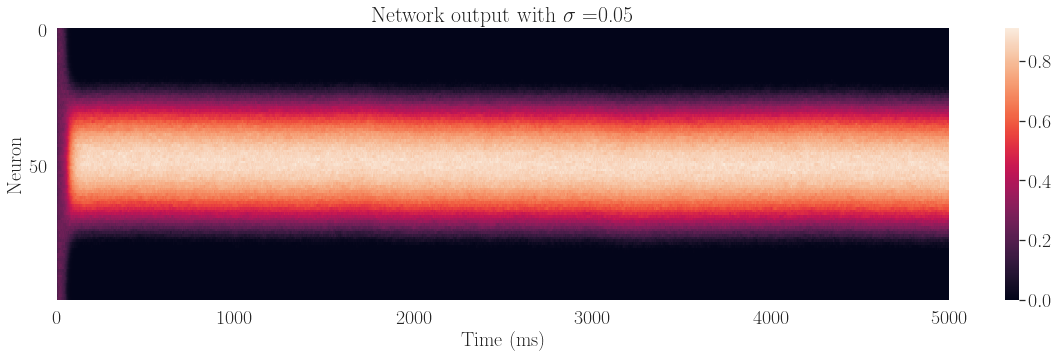

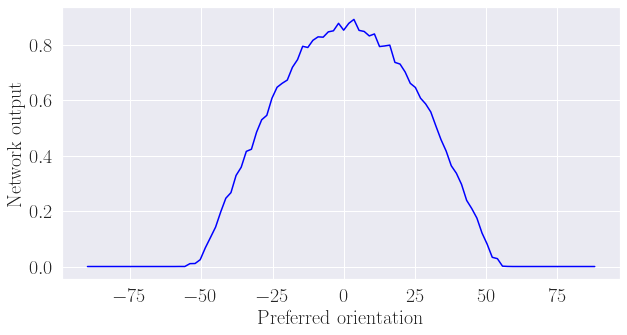

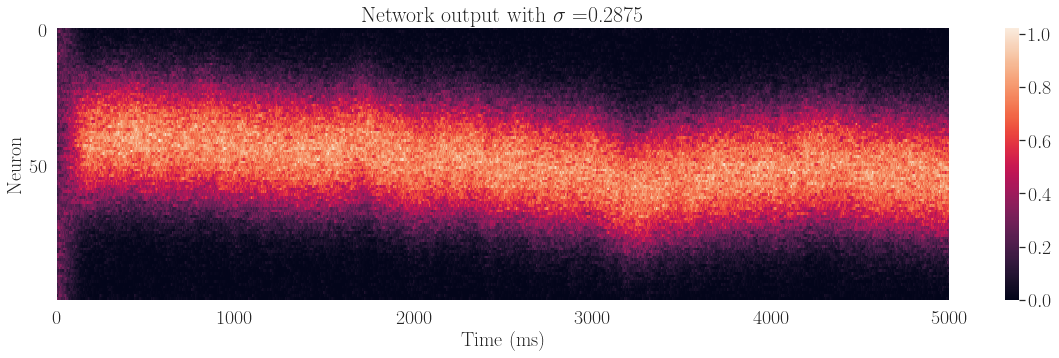

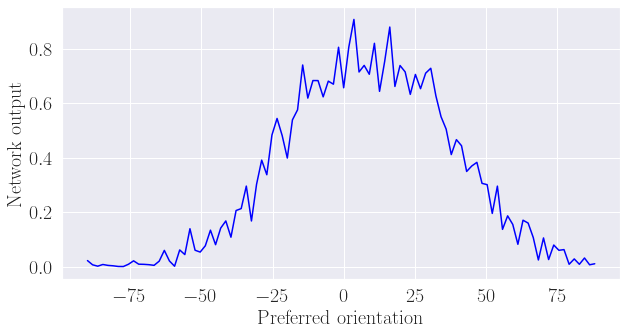

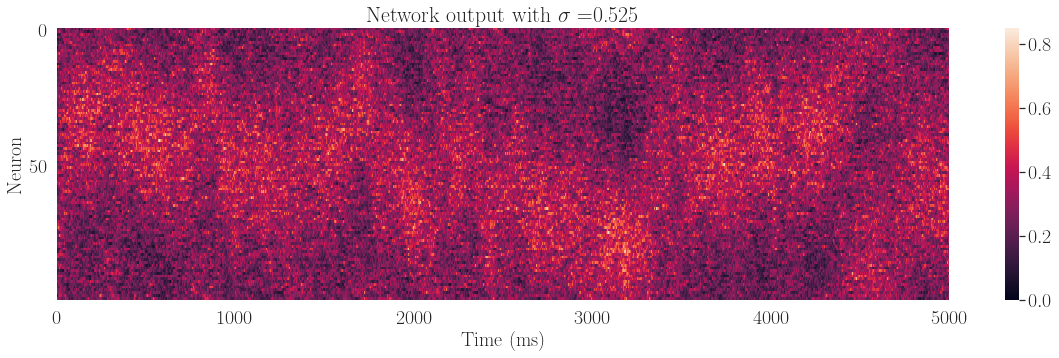

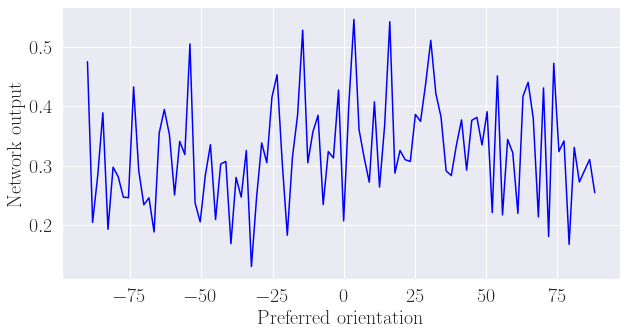

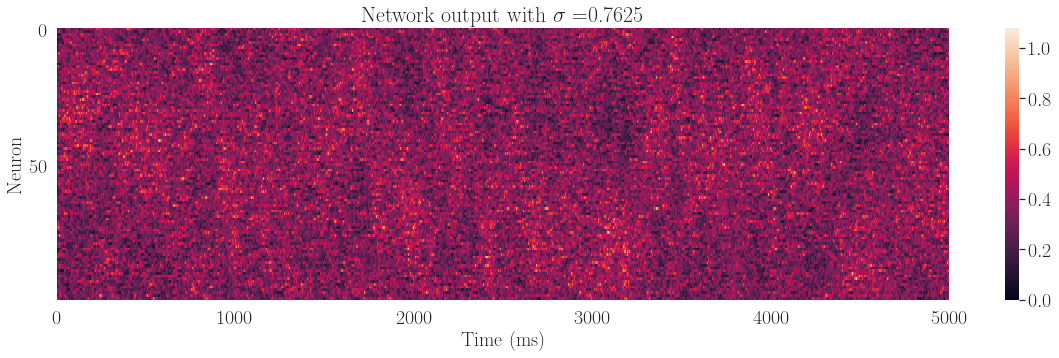

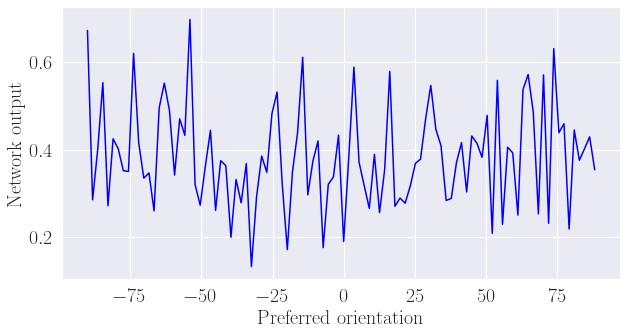

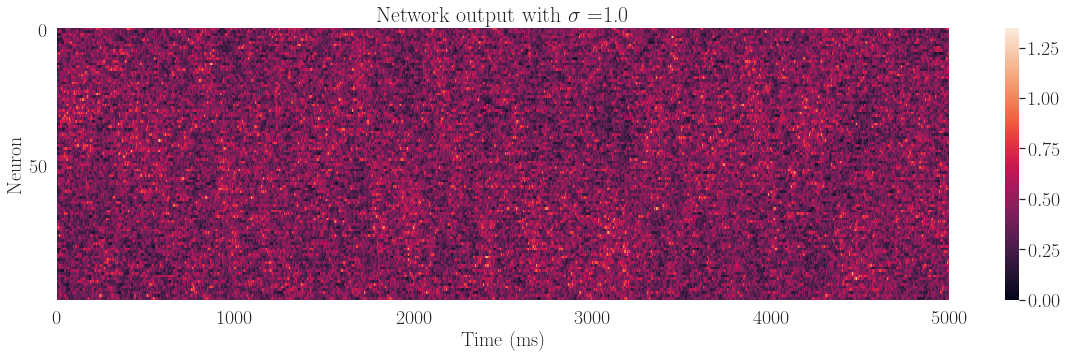

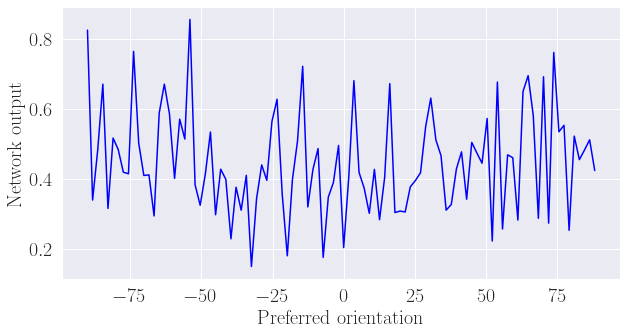

untuned input


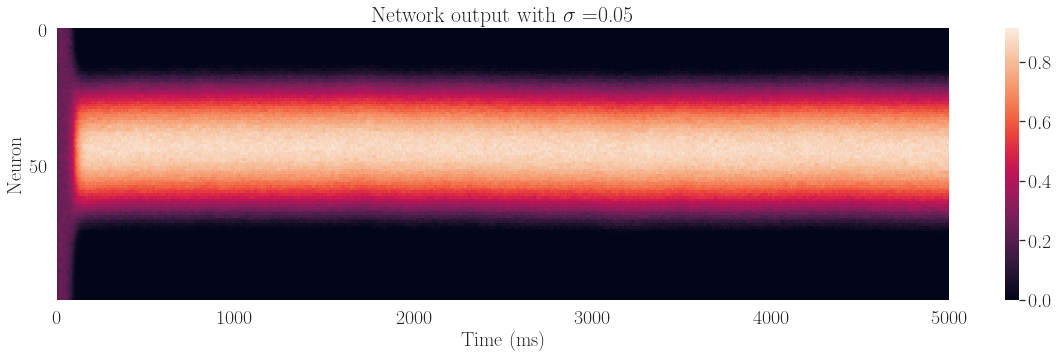

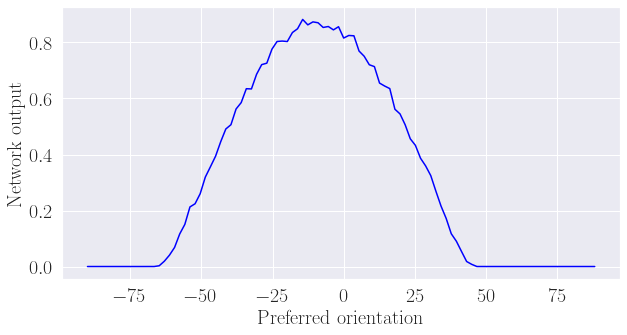

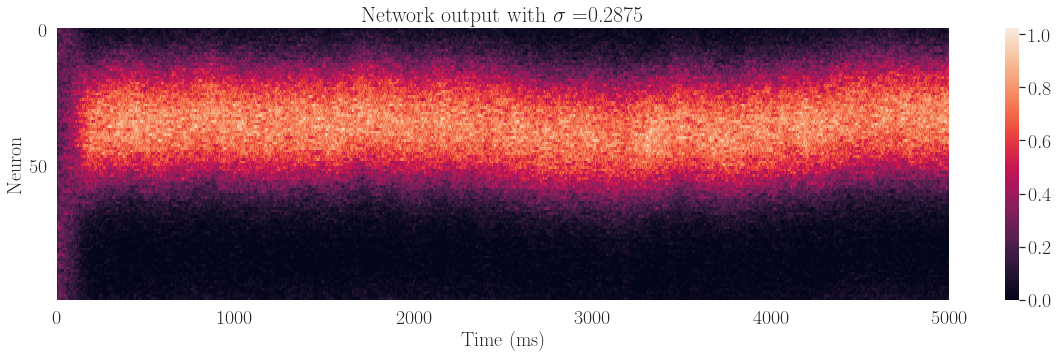

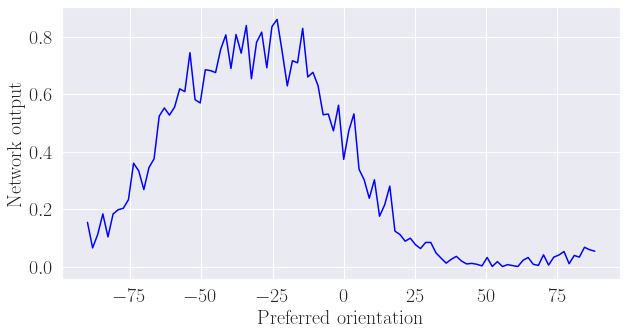

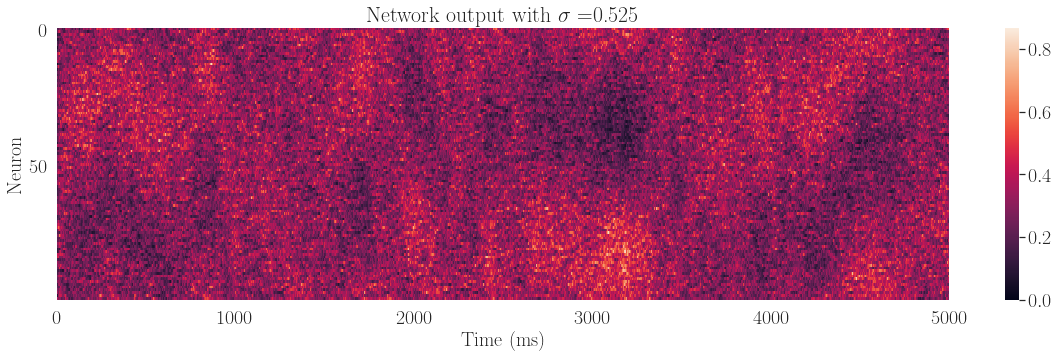

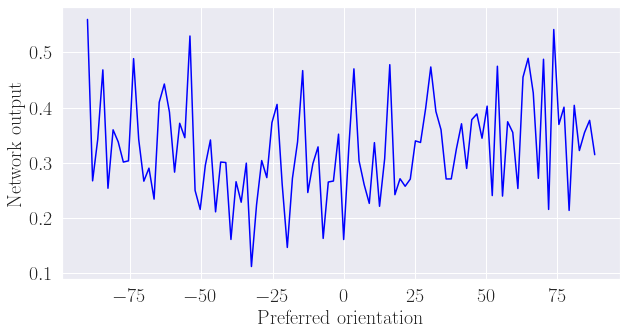

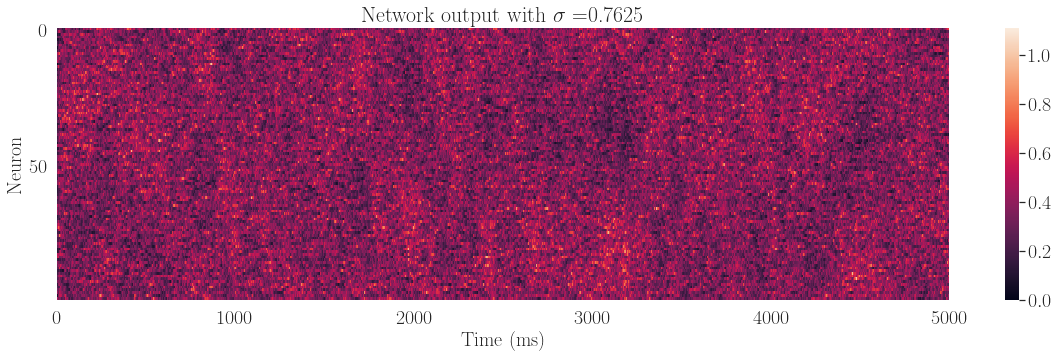

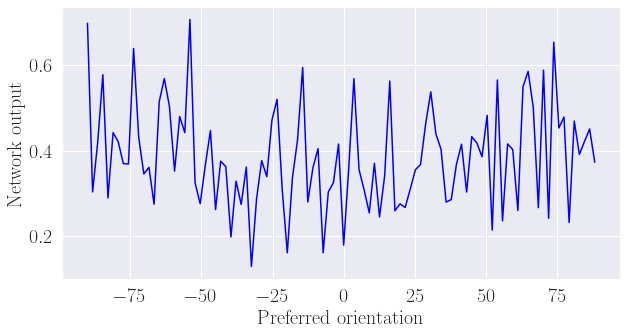

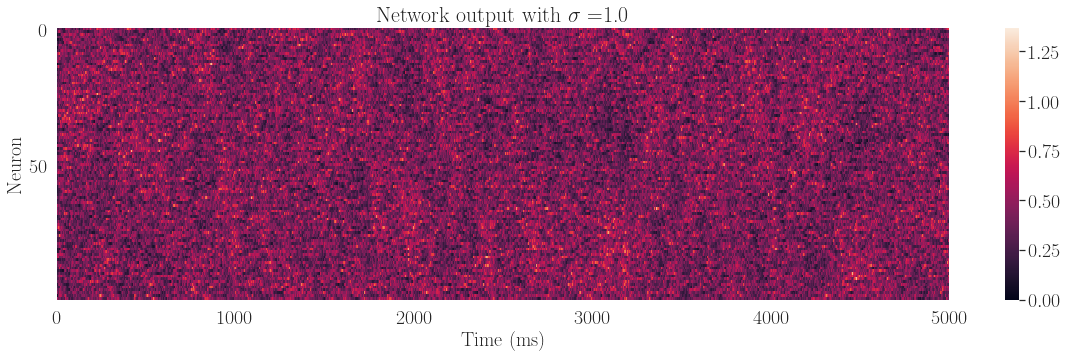

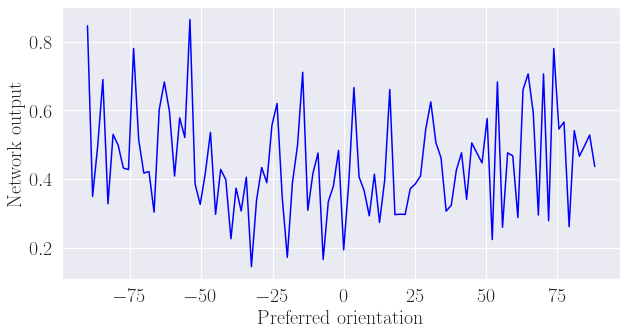

In [10]:
epsilon_HW = 1
epsilon_UI = 1
epsilon_MR = 0.01


theta_0 = 0

epsilons = [epsilon_HW, epsilon_UI, epsilon_MR, 0]
Ws = [W_HW, W_UI, W_MR, W_MR]

network_names = ['Hubel and Wiesel regime', 'Uniform Inhibition', 'Marginal Regime', 'untuned input']

sigmas = np.linspace(0.05, 1, 5)

for sim in range(len(epsilons)): 
    print(network_names[sim])
    for sigma in sigmas: 
        I_ext = generate_noisy_I(N, Nt, c, epsilons[sim], theta_p, theta_0, sigma)
        output = BY_ring_network(None, Ws[sim], I_ext, tau_m, Nt, dt)



        fig, ax = plt.subplots(1,1, figsize = (20,5))
        sns.heatmap(output.T, ax = ax, xticklabels = 1000, yticklabels = 50, )
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        ax.set_title('Network output with $\sigma = $'+str(sigma))
        ax.set_xlabel('Time (ms)')
        ax.set_ylabel('Neuron')
        plt.show()

        fig, ax = plt.subplots(1,1, figsize = (10,5))
        ax.plot(np.degrees(theta_p), output[Nt-1], color = 'blue', label = 'stim on')
        ax.set_xlabel('Preferred orientation')
        ax.set_ylabel('Network output')
        plt.show()




In the Hubel and Wiesel network, input noise can reduce the quality of stimulus encoding (making responses more variable). The marginal regime increases robustness against this input noise by maintaining the shape of the bump despite input noise, but the bump may drift around the ring due to strong noise and weak input tuning, which can reduce coding quality. For very noisy input the bump will be destroyed. Notice that even for weak input noise, the bump may form at the wrong location and take time to settle into the stimulus orientation for the network in the marginal regime.

In the final simulations, we see that a bump will form in the marginal regime even when the input is completely untuned. In this case, input noise will cause the bump to form at a random location and the bump will then drift around the ring due to the influence of ongoing noise. If you try the same thing with the Hubel and Wiesel or uniform inhibition regimes, no bump will form in the absence of tuned external input.

Ps. All simulations use the exact same noise due to the set random seed, if you want to see how the same simulation behaves under different samplings from the noise distribution change the input parameter rseed to any number, e.g. rseed = 10 and compare the simulation results. This is especially interested for the simulation of the marginal regime with untuned input. 


**Noisy input after stimulus deletion**

In [11]:
def generate_untuned_noisy_I(N, Nt, c, sigma, rseed = 1, dt = 1): 
    
    I_ext = np.zeros([Nt,N])
    rng = np.random.RandomState(seed = rseed)
    
    I_ext[:] = c + (1/np.sqrt(dt)) *sigma * rng.randn(Nt,N)
    
    return I_ext

Hubel and Wiesel regime


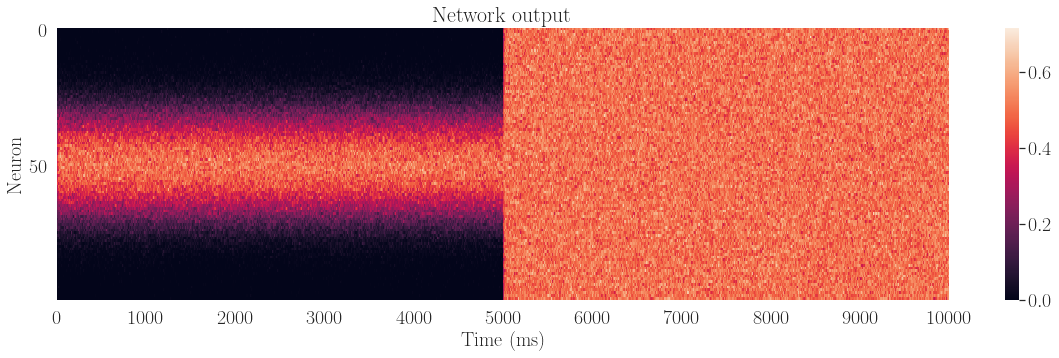

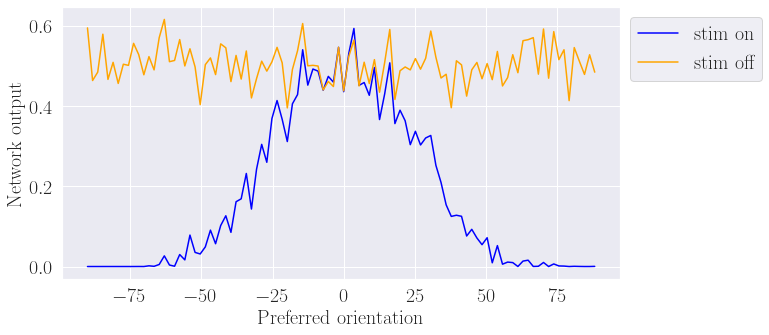

Uniform Inhibition


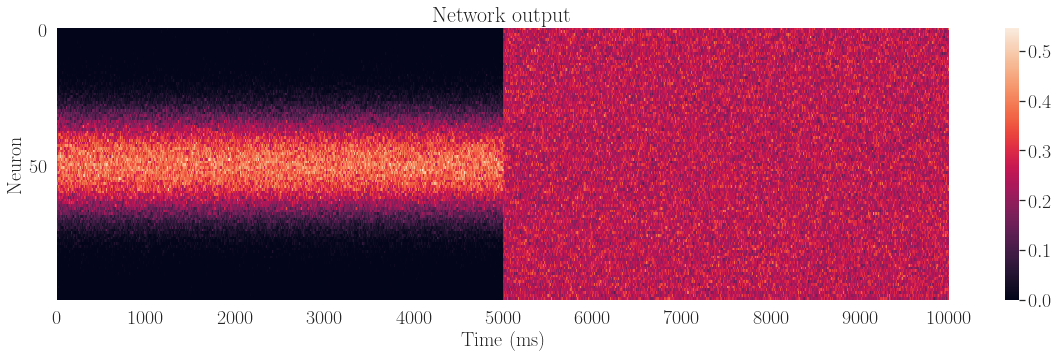

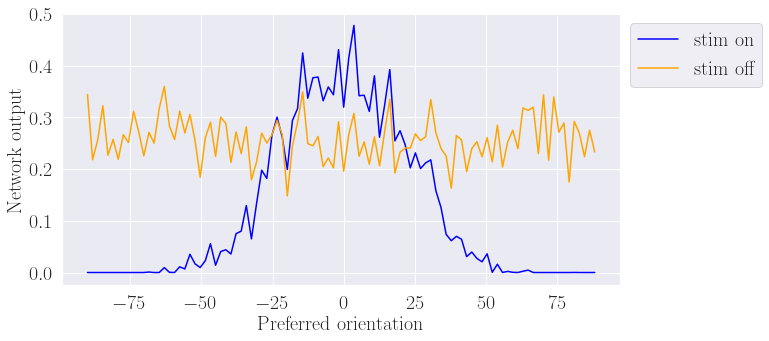

Marginal Regime


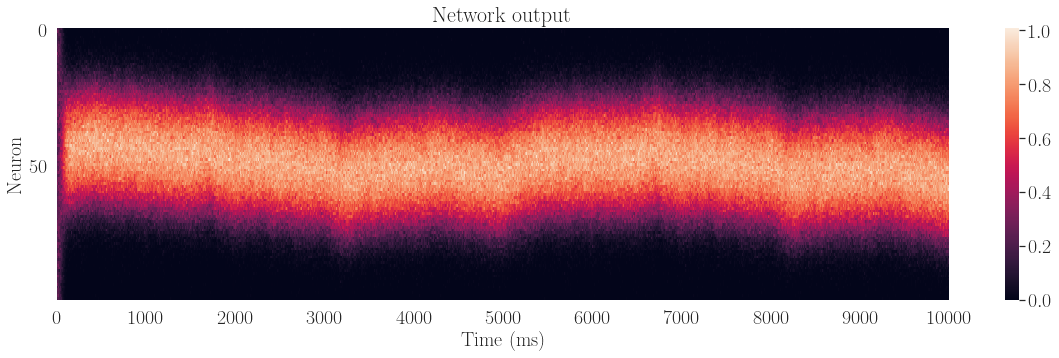

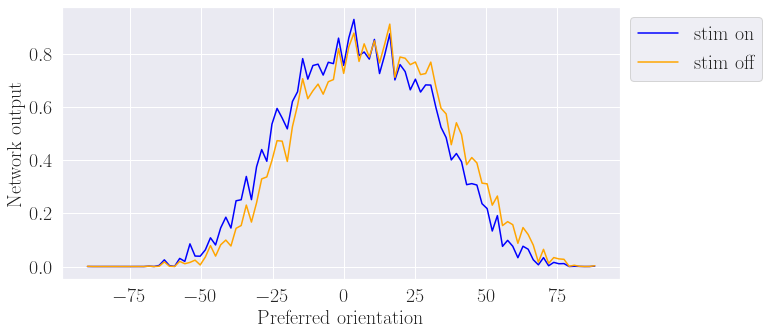

In [12]:
epsilon_HW = 1
epsilon_UI = 1
epsilon_MR = 0.01

sigma = 0.2


theta_0 = 0
network_names = ['Hubel and Wiesel regime', 'Uniform Inhibition', 'Marginal Regime']


epsilons = [epsilon_HW, epsilon_UI, epsilon_MR]
Ws = [W_HW, W_UI, W_MR]

for sim in range(len(epsilons)): 
    print(network_names[sim])
    I_ext = generate_noisy_I(N, Nt, c, epsilons[sim], theta_p, theta_0, sigma)
    output_stimOn = BY_ring_network(None, Ws[sim], I_ext, tau_m, Nt, dt)

    I_ext = generate_untuned_noisy_I(N, Nt, c, sigma)
    output_stimOff = BY_ring_network(output_stimOn[-1], Ws[sim], I_ext, tau_m, Nt, dt)
    
    output = np.concatenate((output_stimOn, output_stimOff), axis = 0)
    

    fig, ax = plt.subplots(1,1, figsize = (20,5))
    sns.heatmap(output.T, ax = ax, xticklabels = 1000, yticklabels = 50, )
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title('Network output')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Neuron')
    plt.show()
    
    fig, ax = plt.subplots(1,1, figsize = (10,5))
    ax.plot(np.degrees(theta_p), output[Nt-1], color = 'blue', label = 'stim on')
    ax.plot(np.degrees(theta_p), output[(2*Nt)-1], color = 'orange', label = 'stim off')
    ax.set_xlabel('Preferred orientation')
    ax.set_ylabel('Network output')
    ax.legend(bbox_to_anchor=(1., 1.0), loc='upper left', fontsize = 20)
    plt.show()




As mentioned before, the network in the marginal regime is more noise robust than the remaining two. Only the network in the marginal regime is able to retain the information about the presented stimulus after the stimulus has been deleted. The other networks lose their stimulus selectivity and ony display random, non specific activity pattern. Over time the bump will drift in the marginal regime following stimulus deletion. In working memory models, this drift of the bump following stimulus deletion causes a loss - or forgetting - of stimulus information during the delay period.

Overall these results indicate that recurrent dynamics (connections) are important for working memory. Without any information in the network about its own activation history, only the current input is represented in the network activity. 